In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets
!pip install nltk
!pip install gensim
!pip install transformers
!pip install transformer-lens
!pip install circuitsvis
!pip install lexicalrichness
!pip install wordfreq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:

In [ ]:
IN_COLAB = True

import plotly.io as pio
if IN_COLAB:
    pio.renderers.default = "colab"
else:
    pio.renderers.default = "notebook_connected"
print(f"Using renderer: {pio.renderers.default}")

Using renderer: colab


In [ ]:
import os

# Change directory to your working directory
DATA_DIR = "/content/drive/MyDrive/NLP_Final_project/"

os.chdir(DATA_DIR)
os.getcwd()

'/content/drive/MyDrive/NLP_Final_project'

In [ ]:
# some stupid hugging face nonesense
os.environ["WANDB_DISABLED"] = "true"


In [ ]:
import torch
from torch.nn import functional as F
from torch.utils.data import Dataset
import sentencepiece as spm
import math
import multiprocessing
from datasets import load_dataset
from datasets import concatenate_datasets
from datasets import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import circuitsvis as cv

Loading the datasets - we only needed to load them once and then we pickled them


In [ ]:
# babylm = load_dataset("nilq/babylm-10M", split="train[:15%]")  # Load only 15% of data
# cnn_dailymail = load_dataset("abisee/cnn_dailymail", "3.0.0", split="train[:10%]")
# cnn_dailymail = cnn_dailymail.rename_column("article", "text")

### EXPLORATORY DATA ANALYSIS

In [ ]:
# wiki_dataset = load_dataset("wikimedia/wikipedia", data_files="20231101.en/train-00001-of-00041.parquet")

In [ ]:

# babylm_df = pd.DataFrame(babylm)
# wikipedia_df = pd.DataFrame(wiki_dataset['train'])

# # Compute word counts
# babylm_df["word_count"] = babylm_df["text"].apply(lambda x: len(x.split()))
# wikipedia_df["word_count"] = wikipedia_df["text"].apply(lambda x: len(x.split()))

# # Print dataset word count stats
# print("BABY Dataset Stats:")
# print(babylm_df["word_count"].describe(), "\n")

# print("Wiki Dataset Stats:")
# print(wikipedia_df["word_count"].describe(), "\n")

# # Plot histograms of sentence lengths
# plt.figure(figsize=(10, 5))
# plt.hist(babylm_df["word_count"], bins=50, alpha=0.7, label="BabyLM", color='blue')
# plt.hist(wikipedia_df["word_count"], bins=50, alpha=0.7, label="Wikipedia", color='orange')
# plt.legend()
# plt.xlabel("Word Count per Sample")
# plt.ylabel("Frequency")
# plt.title("Distribution of Word Counts in BabyLM vs. CNN/DailyMail")
# plt.show()

# #total
# total_baby_words = babylm_df["word_count"].sum()
# total_adult_words = wikipedia_df["word_count"].sum()

# print(total_baby_words)
# print(total_adult_words)


In [ ]:

# wikipedia_df["cumulative_word_count"] = wikipedia_df["word_count"].cumsum()

# # Sample Wikipedia until it reaches BabyLM's total word count
# wikipedia_balanced = wikipedia_df[wikipedia_df["cumulative_word_count"] <= total_baby_words]

# # Drop the extra column
# wikipedia_balanced = wikipedia_balanced.drop(columns=["cumulative_word_count"])

# # Print new total word count
# print(f" Wikipedia Total Words: {wikipedia_balanced['word_count'].sum()}")
# print(f" babylm Total Words: {babylm_df['word_count'].sum()}")

In [ ]:
# babylm_df["text"] = "[BABY] " + babylm_df["text"]
# wikipedia_balanced["text"] = "[ADULT] " + wikipedia_balanced["text"]

In [ ]:
# babylm_dataset_edited = Dataset.from_pandas(babylm_df[["text"]])  # Keep only 'text' column
# wikipedia_dataset_edited = Dataset.from_pandas(wikipedia_balanced[["text"]])  # Keep only 'text' column

In [ ]:
#this is where we concatenate the comined datasets - in the above steps we ensure word count is equal
# combined_dataset = concatenate_datasets([babylm_dataset_edited, wikipedia_dataset_edited])

### load in a pretrained model - GPT2

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load GPT-2 model & tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:

#tokenize the dataset

#apparently gpt2 is causal so we can do this as a quick fix:
#CITATION: https://github.com/huggingface/transformers/issues/2630#issuecomment-1290809338

tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

# tokenized_dataset = combined_dataset.map(tokenize_function, batched=True)
# tokenized_dataset = tokenized_dataset.remove_columns(["text"])  # Remove original text
# tokenized_dataset.set_format("torch")

In [ ]:
# tokenized_dataset.save_to_disk("/content/drive/MyDrive/NLP_Final_project/tokenized_dataset_v2")


In [ ]:
from datasets import load_from_disk

tokenized_dataset = load_from_disk("/content/drive/MyDrive/NLP_Final_project/tokenized_dataset_v2")
print(tokenized_dataset)

Dataset({
    features: ['__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 160949
})


In [ ]:
# tokenized_dataset = tokenized_dataset.remove_columns(["id"])

In [ ]:
# test - no need for this anymore - THIS IS A FINE TUNING TEST

# small_train_dataset = tokenized_dataset.select(range(100))  # Adjust as needed
# small_train_dataset

### MODEL FINE TUNING

In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/NLP_Final_project/gpt2_finetuned_ckpt_2",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=2000,
    save_strategy="steps",
    logging_steps=500,
    gradient_accumulation_steps=4,
    save_total_limit=1,  # Keep only last 2 checkpoints
    load_best_model_at_end=False,  # No eval, so we can't load "best" model
    fp16=True,
)

#doing this agian hiarer
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

#big boy dataset
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)


# trainer.train()


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

checkpoint_path = "/content/drive/MyDrive/NLP_Final_project/gpt2_finetuned_ckpt_2/checkpoint-15087"
model = AutoModelForCausalLM.from_pretrained(checkpoint_path)


In [ ]:
#input a new prompt
prompt = "[BABY] Dogs are "
# prompt = "[ADULT] df"
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_ids = tokenizer.encode(prompt, return_tensors="pt")

# set top_k = 50 and set top_p = 0.95 and num_return_sequences = 3 - we take this code from the huggingface tutorial on decoding methods:
#https://huggingface.co/blog/how-to-generate
sample_outputs = model.generate(
    input_ids,
    max_new_tokens=50,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=3,
)

print(tokenizer.decode(sample_outputs[0], skip_special_tokens=True))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[BABY] Dogs are  we're using words, words  so if you think that's a bad  you can be a bad  erm then that's an offence  or you can be an okay  that's an excuse for  or you can be an okay 


In [ ]:
import seaborn as sns

In [ ]:
from transformer_lens import HookedTransformer
import transformer_lens

# Convert Hugging Face GPT-2 model to TransformerLens format
tl_model = HookedTransformer.from_pretrained(model_name, hf_model=model)

Loaded pretrained model gpt2 into HookedTransformer


#### Average patching - controlling variance and getting a true direction of complexity:

In [ ]:
#assembling_prompts - saving
import pickle
# baby_prompts = babylm_df['text'][100000:101000]
# baby_prompts = ['[BABY] '] + baby_prompts
# baby_prompts = baby_prompts[:1000]
# baby_prompts = list(map(lambda x: tokenizer(x, return_tensors="pt")["input_ids"], baby_prompts))

# with open('/content/drive/MyDrive/NLP_Final_project/baby_prompts.pkl', 'wb') as f:
#     pickle.dump(baby_prompts, f)

In [ ]:
#load the pickle file
# with open('/content/drive/MyDrive/NLP_Final_project/baby_prompts.pkl', 'rb') as f:
#     baby_prompts = pickle.load(f)

In [ ]:
# adult_prompts = babylm_df['text'][100000:101000]
# adult_prompts = ['[ADULT] '] + adult_prompts
# adult_prompts = adult_prompts[:1000]
# adult_prompts = list(map(lambda x: tokenizer(x, return_tensors="pt")["input_ids"], adult_prompts))

# with open('/content/drive/MyDrive/NLP_Final_project/adult_prompts.pkl', 'wb') as f:
#     pickle.dump(adult_prompts, f)



In [ ]:
# with open('/content/drive/MyDrive/NLP_Final_project/adult_prompts.pkl', 'rb') as f:
#     adult_prompts = pickle.load(f)


### Activation Patching Deep Analysis

In [ ]:
from transformers import AutoTokenizer
import torch
from wordfreq import word_frequency
import math
import string
import transformer_lens.patching as patching

# ----- Helper Functions -----

def is_valid_token(token: str):
    """
    Returns True if the token (after cleaning) is not empty and is not solely punctuation.
    """
    token_clean = token.strip().lstrip("Ġ")
    if not token_clean or all(ch in string.punctuation for ch in token_clean):
        return False
    return True

def frequency_complexity(token: str):
    """
    Computes a frequency-based complexity score for a token:
      complexity = -log10(freq)
    so that lower frequency words (rarer words) yield higher scores.
    """
    token_clean = token.strip().lstrip("Ġ")
    freq = word_frequency(token_clean.lower(), 'en')
    return -math.log10(freq + 1e-9)

def get_average_complexity_from_logits(logits, tokens, top_k: int = 10):
    """
    Computes the average frequency-based complexity score from given logits and tokens.
    Assumes:
      - logits is of shape [sequence_length, vocab_size] (for a single example)
      - tokens is the corresponding token list.
    For each token that starts with "Ġ" (i.e. a word-start), it:
      1. Retrieves the top_k candidate completions from the logits.
      2. Filters out candidates that are just punctuation/whitespace.
      3. Computes the average frequency complexity for those valid candidates.
    Returns the overall average complexity across the valid tokens.
    """
    per_token_complexities = []
    i = 0
    for i, (token, word_logit) in enumerate(zip(tokens, logits)):
        if i < 4:
            continue  # Skip de begining - cuz it has [ADULT] and [BABY]

        topk = torch.topk(word_logit.flatten(), k=top_k)
        candidates = [tokenizer.decode(topk.indices[i].item()) for i in range(top_k)]
        valid_candidates = [cand for cand in candidates if is_valid_token(cand)]

        if valid_candidates:
            token_complexity = sum(frequency_complexity(cand) for cand in valid_candidates) / len(valid_candidates)
            per_token_complexities.append(token_complexity)
    if per_token_complexities:
        overall_avg = sum(per_token_complexities) / len(per_token_complexities)
    else:
        overall_avg = None
    return overall_avg

# Patching baby prompts with adult cache

Major credit to Neel Nanda's tutorial: https://colab.research.google.com/github/TransformerLensOrg/TransformerLens/blob/main/demos/Activation_Patching_in_TL_Demo.ipynb#scrollTo=1djTp3yOVGD8



In [ ]:
#metric functions - note this is a dry run of the functions, they are made cleaner and better below

# ----- Custom Complexity Metric Function -----

def custom_complexity_metric_from_logits_1(logits, tokens, top_k: int = 10):
    """
    Computes a normalized complexity score from the provided logits and tokens.
    The score is normalized using the BABY and ADULT baselines so that:
      - BABY prompt returns 0.
      - ADULT prompt returns 1.
    """
    # print(logits)
    # print(tokens)
    score = get_average_complexity_from_logits(logits, tokens, top_k)
    if score is None:
        print("Warning: No valid tokens found")
        score = BABY_BASELINE if BABY_BASELINE is not None else 0.0
    # Check if baselines are valid:
    if BABY_BASELINE is None or ADULT_BASELINE is None:
        raise ValueError("Baseline values are not properly set.")
    normalized_score = (score - BABY_BASELINE) / (ADULT_BASELINE - BABY_BASELINE)
    return normalized_score

def custom_metric_wrapper_1(logits):
    """
    Expects logits of shape [sequence_length, vocab_size] for a single example.
    Returns the normalized complexity metric.
    """
    return torch.tensor(custom_complexity_metric_from_logits_1(logits[0], tokens_baby, top_k=10))


In [ ]:
# ----- Baseline Computation Using Logits -----

# Define our baseline prompts
BABY_PROMPT = "[BABY] Goo goo gaa gaa "
ADULT_PROMPT = "[ADULT] Goo goo gaa gaa "

# Compute baseline logits and tokens for the BABY prompt
input_ids_baby = tokenizer.encode(BABY_PROMPT, return_tensors="pt")
tokens_baby = tokenizer.convert_ids_to_tokens(input_ids_baby[0])
logits_baby, cache_baby = tl_model.run_with_cache(input_ids_baby)

# cuz its a (1, x, x)
BABY_BASELINE = get_average_complexity_from_logits(logits_baby[0], tokens_baby)

# Compute baseline logits and tokens for the ADULT prompt
input_ids_adult = tokenizer.encode(ADULT_PROMPT, return_tensors="pt")
tokens_adult = tokenizer.convert_ids_to_tokens(input_ids_adult[0])

logits_adult, cache_adult = tl_model.run_with_cache(input_ids_adult)
ADULT_BASELINE = get_average_complexity_from_logits(logits_adult[0], tokens_adult)

# Baseline check:
# Using the same function on the baseline prompts should return values near 0 and 1!
input_ids_baby = tokenizer.encode(BABY_PROMPT, return_tensors="pt")
tokens_baby = tokenizer.convert_ids_to_tokens(input_ids_baby[0])
logits_baby, cache_baby = tl_model.run_with_cache(input_ids_baby)
print(f"Baby baseline (should be 0): {custom_complexity_metric_from_logits_1(logits_baby[0], tokens_baby):.4f}")

input_ids_adult = tokenizer.encode(ADULT_PROMPT, return_tensors="pt")
tokens_adult = tokenizer.convert_ids_to_tokens(input_ids_adult[0])
logits_adult, cache_adult = tl_model.run_with_cache(input_ids_adult)
print(f"Adult baseline (should be 1): {custom_complexity_metric_from_logits_1(logits_adult[0], tokens_adult):.4f}")

Baby baseline (should be 0): 0.0000
Adult baseline (should be 1): 1.0000


In [ ]:
#we call TL functions to do the actual patching as shown:

# resid_pre_act_patch_results = patching.get_act_patch_resid_pre(tl_model, input_ids_baby, cache_adult, custom_metric_wrapper_1)
# attn_head_out_all_pos_act_patch_results = patching.get_act_patch_attn_head_out_all_pos(tl_model, input_ids_baby, cache_adult, custom_metric_wrapper_1)
mlp_patch = patching.get_act_patch_mlp_out(tl_model, input_ids_baby, cache_adult, custom_metric_wrapper_1)

  0%|          | 0/144 [00:00<?, ?it/s]

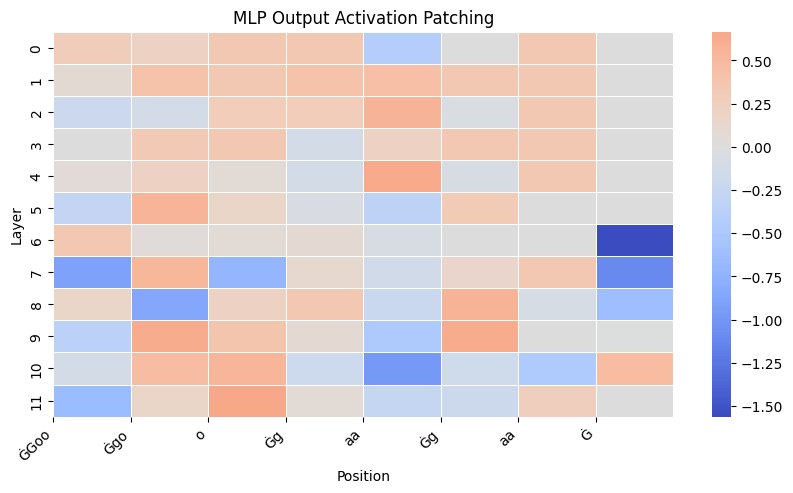

In [ ]:
# Assuming mlp_patch is obtained from:
mlp_patch_np = mlp_patch.cpu().numpy()
mlp_patch_np = mlp_patch_np[:, 4:]

tokens = tokenizer.convert_ids_to_tokens(input_ids_baby[0])
tokens = tokens[4:]


plt.figure(figsize=(10, 5))
sns.heatmap(mlp_patch_np, cmap="coolwarm", center=0, linewidths=0.5, cbar=True)
plt.xlabel("Position")
plt.ylabel("Layer")
plt.xticks(ticks=np.arange(len(tokens)), labels=tokens, rotation=45, ha="right")

plt.title("MLP Output Activation Patching")
plt.show()




In [ ]:
mlp_patch.shape

torch.Size([12, 12])

# AUTOMATING ADULT CACHE PATCHING - MAIN CODE

In [ ]:
def get_cache_baselines(baby_prompt, adult_prompt, tl_model = tl_model, tokenizer = tokenizer):
    """
    Automates getting out the cache and computing the baselines for the given prompts.
    """
    #THIS FUNCTION SHOULD WORK FOR BOTH I THINK

    # Compute baseline logits and tokens for the BABY prompt
    input_ids_baby = tokenizer.encode(baby_prompt, return_tensors="pt")
    tokens_baby = tokenizer.convert_ids_to_tokens(input_ids_baby[0])
    logits_baby, cache_baby = tl_model.run_with_cache(input_ids_baby)

    BABY_BASELINE = get_average_complexity_from_logits(logits_baby[0], tokens_baby)

    # Compute baseline logits and tokens for the ADULT prompt
    input_ids_adult = tokenizer.encode(adult_prompt, return_tensors="pt")
    tokens_adult = tokenizer.convert_ids_to_tokens(input_ids_adult[0])
    logits_adult, cache_adult = tl_model.run_with_cache(input_ids_adult)
    ADULT_BASELINE = get_average_complexity_from_logits(logits_adult[0], tokens_adult)

    res_adult = [ADULT_BASELINE, cache_adult, logits_adult, input_ids_adult, tokens_adult]
    res_baby = [BABY_BASELINE, cache_baby, logits_baby, input_ids_baby, tokens_baby]

    return res_adult, res_baby

res_adult, res_baby = get_cache_baselines(BABY_PROMPT, ADULT_PROMPT)

#decompose these lists

ADULT_BASELINE, cache_adult, logits_adult, input_ids_adult, tokens_adult = res_adult
BABY_BASELINE, cache_baby, logits_baby, input_ids_baby, tokens_baby = res_baby

print(ADULT_BASELINE)

4.102227447644327


In [ ]:
# adjusted metric - no longer relying on global variables

def custom_complexity_metric_from_logits_1(logits, tokens, baby_baseline, adult_baseline, top_k: int = 10):
    """
    Computes a normalized complexity score from the provided logits and tokens,
    using provided baseline values so that:
      - BABY prompt returns 0.
      - ADULT prompt returns 1.
    """
    score = get_average_complexity_from_logits(logits, tokens, top_k)
    if score is None:
        print("Warning: No valid tokens found")
        score = baby_baseline if baby_baseline is not None else 0.0
    if baby_baseline is None or adult_baseline is None:
        raise ValueError("Baseline values are not properly set.")
    normalized_score = (score - baby_baseline) / (adult_baseline - baby_baseline)
    return normalized_score

def custom_metric_wrapper_1_factory(baby_baseline, adult_baseline, tokens):
    """
    Returns a custom metric wrapper function that uses the given baselines and tokens.
    The returned function expects logits of shape [sequence_length, vocab_size] for a single example.
    """
    def wrapper(logits):
        # Index [0] to remove the batch dimension
        metric = custom_complexity_metric_from_logits_1(logits[0], tokens, baby_baseline, adult_baseline, top_k=10)
        return torch.tensor(metric)
    return wrapper


In [ ]:
def baby_patch_adult_cache(prompt_list, tl_model = tl_model, tokenizer = tokenizer):

  #this function just automates creating proper outputs given prompts
  from collections import defaultdict

  patching_results = defaultdict(list)

  for prompt in prompt_list:
      baby_prompt = "[BABY] " + prompt
      adult_prompt = "[ADULT] " + prompt

      res_adult, res_baby = get_cache_baselines(baby_prompt, adult_prompt)
      ADULT_BASELINE, cache_adult, logits_adult, input_ids_adult, tokens_adult = res_adult
      BABY_BASELINE, cache_baby, logits_baby, input_ids_baby, tokens_baby = res_baby

      custom_metric_wrapper_1 = custom_metric_wrapper_1_factory(BABY_BASELINE, ADULT_BASELINE, tokens_baby)

      # run the patching experiments
      resid_pre_act_patch_results = patching.get_act_patch_resid_pre(tl_model, input_ids_baby, cache_adult, custom_metric_wrapper_1)

      attn_head_out_all_pos_act_patch_results = patching.get_act_patch_attn_head_out_all_pos(tl_model, input_ids_baby, cache_adult, custom_metric_wrapper_1)
      mlp_patch = patching.get_act_patch_mlp_out(tl_model, input_ids_baby, cache_adult, custom_metric_wrapper_1)

      # every_head_all_pos_act_patch_result = patching.get_act_patch_attn_head_all_pos_every(tl_model, input_ids_baby, cache_adult, custom_metric_wrapper_1)

      patching_results[prompt] = {
            "resid_pre": resid_pre_act_patch_results,
            "attn_head_out": attn_head_out_all_pos_act_patch_results,
            "mlp_out": mlp_patch,
            "tokens_baby": tokens_baby,
            "tokens_adult": tokens_adult
        }

  return patching_results

In [ ]:
prompt_list = [
    "I went to guadacanal"]

# patching_results = baby_patch_adult_cache(prompt_list, tl_model, tokenizer)


  0%|          | 0/132 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
def plot_resid_and_attn_list(patching_results, skip_tokens=4, figsize=(10,5)):
    """
    patching_results: a list of dicts, each containing:
        'prompt': str,
        'resid_pre': <tensor of shape [layers, positions]>,
        'attn_head_out': <tensor of shape [layers, heads]>,
        'tokens_baby': <list of tokens> (or 'tokens_adult' if you prefer)

    We produce a figure with 2 subplots (resid_pre vs. attn_head_out) for each item in the list.
    """
    for item in patching_results:
        print(item)
        prompt = item
        resid_tensor = patching_results[prompt]["resid_pre"]
        attn_tensor = patching_results[prompt]["attn_head_out"]
        tokens_baby = patching_results[prompt]["tokens_baby"]  # or tokens_adult if you prefer

        print(tokens_baby)

        resid_np = resid_tensor.cpu().numpy()  # shape [num_layers, seq_len]
        attn_np = attn_tensor.cpu().numpy()    # shape [num_layers, num_heads]

        # Skip first `skip_tokens` columns in the resid_pre plot, if you want
        if skip_tokens < resid_np.shape[1]:
            resid_np = resid_np[:, skip_tokens:]
            tokens_plot = tokens_baby[skip_tokens:]
        else:
            tokens_plot = tokens_baby

        def strip_special(token: str):
            return token.lstrip("Ġ").strip()

        tokens_plot = [strip_special(tok) for tok in tokens_plot]

        # Create a figure with 2 subplots
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        main_title="Patching Baby Prompt with Adult Activations\n(Normalization: Baby baseline =0, Adult Baseline =1)"

        fig.suptitle(main_title, fontsize=14, y=1.08)

        # --- Left subplot: resid_pre ---
        sns.heatmap(
            resid_np,
            ax=axes[0],
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar=True
        )
        axes[0].set_title(f"Patching Residual Stream before Transformer block \nPrompt: {prompt}")
        axes[0].set_xlabel("Position")
        axes[0].set_ylabel("Layer")

        # Label the x-axis with your tokens
        axes[0].set_xticks(np.arange(len(tokens_plot)) + 0.5)
        axes[0].set_xticklabels(tokens_plot, rotation=45, ha="right")

        # --- Right subplot: attn_head_out ---
        sns.heatmap(
            attn_np,
            ax=axes[1],
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar=True
        )
        axes[1].set_title(f"Patching Attention Head Output\nPrompt: {prompt}")
        axes[1].set_xlabel("Head")
        axes[1].set_ylabel("Layer")

        plt.tight_layout()
        plt.show()


In [ ]:
def plot_resid_attn_mlp_list(
    patching_results,
    skip_tokens=4,
    figsize=(20,5),
    main_title="Patching Baby Prompt with Adult Activations\n(Normalization: Baby Baseline =0, Adult Baseline =1)"
):
    """
    patching_results: a list of dicts, each containing:
        {
            "prompt": str,
            "resid_pre": <tensor [layers, positions]>,
            "attn_head_out": <tensor [layers, heads]>,
            "mlp_out": <tensor [layers, positions]>,
            "tokens_baby": <list of tokens>,  # or "tokens_adult"
            ...
        }
    Produces one figure (with 3 subplots) per prompt:
      1) resid_pre (rows=layers, cols=positions)
      2) attn_head_out (rows=layers, cols=heads)
      3) mlp_out (rows=layers, cols=positions)

    skip_tokens: how many tokens from the left to skip in the x-axis for resid_pre & mlp_out
    main_title: suptitle for each figure
    """

    def strip_special(token: str):
        # remove leading "Ġ" and strip whitespace
        return token.lstrip("Ġ").strip()

    for item in patching_results:
        # item is a dict for one prompt
        prompt = item
        resid_tensor = patching_results[prompt]["resid_pre"]
        attn_tensor = patching_results[prompt]["attn_head_out"]
        mlp_tensor   = patching_results[prompt]["mlp_out"]
        tokens_baby = patching_results[prompt]["tokens_baby"]

        # Convert to NumPy
        resid_np = resid_tensor.cpu().numpy()
        attn_np  = attn_tensor.cpu().numpy()
        mlp_np   = mlp_tensor.cpu().numpy()

        # Possibly skip tokens in resid & mlp
        if skip_tokens < resid_np.shape[1]:
            resid_np = resid_np[:, skip_tokens:]
            mlp_np   = mlp_np[:, skip_tokens:]
            tokens_plot = tokens_baby[skip_tokens:]
        else:
            tokens_plot = tokens_baby

        # Clean up tokens for x-axis
        tokens_plot = [strip_special(tok) for tok in tokens_plot]

        # Create a figure with 3 subplots
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
        fig.suptitle(main_title + "\n Prompt: " + prompt, fontsize=14)

        # --- Subplot 1: resid_pre ---
        sns.heatmap(
            resid_np,
            ax=axes[0],
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar=True
        )
        axes[0].set_title(f"Patching Residual Stream")
        axes[0].set_xlabel("Position")
        axes[0].set_ylabel("Layer")
        # Label the x-axis with tokens
        axes[0].set_xticks(np.arange(len(tokens_plot)) + 0.5)
        axes[0].set_xticklabels(tokens_plot, rotation=45, ha="right")

        # --- Subplot 2: attn_head_out ---
        sns.heatmap(
            attn_np,
            ax=axes[1],
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar=True
        )
        axes[1].set_title(f"Patching Attention Head Output")
        axes[1].set_xlabel("Head")
        axes[1].set_ylabel("Layer")

        # --- Subplot 3: mlp_out ---
        sns.heatmap(
            mlp_np,
            ax=axes[2],
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar=True
        )
        axes[2].set_title(f"Patching MLP Output")
        axes[2].set_xlabel("Position")
        axes[2].set_ylabel("Layer")
        # Label x-axis for MLP
        axes[2].set_xticks(np.arange(len(tokens_plot)) + 0.5)
        axes[2].set_xticklabels(tokens_plot, rotation=45, ha="right")

        plt.tight_layout()
        plt.show()


In [ ]:

prompt_list = [
    "The election is close",
    "The election is close, the country is on edge"
    ]

#only need to run this once because we can pickle the results
# patching_results_politic = baby_patch_adult_cache(prompt_list, tl_model, tokenizer)




In [ ]:
# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_politic.pkl", "wb") as f:
#     pickle.dump(patching_results_politic, f)

# pickling!
with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_politic.pkl", "rb") as f:
    patching_results_politic_loaded = pickle.load(f)

The election is close
['[', 'BA', 'BY', ']', 'ĠThe', 'Ġelection', 'Ġis', 'Ġclose']


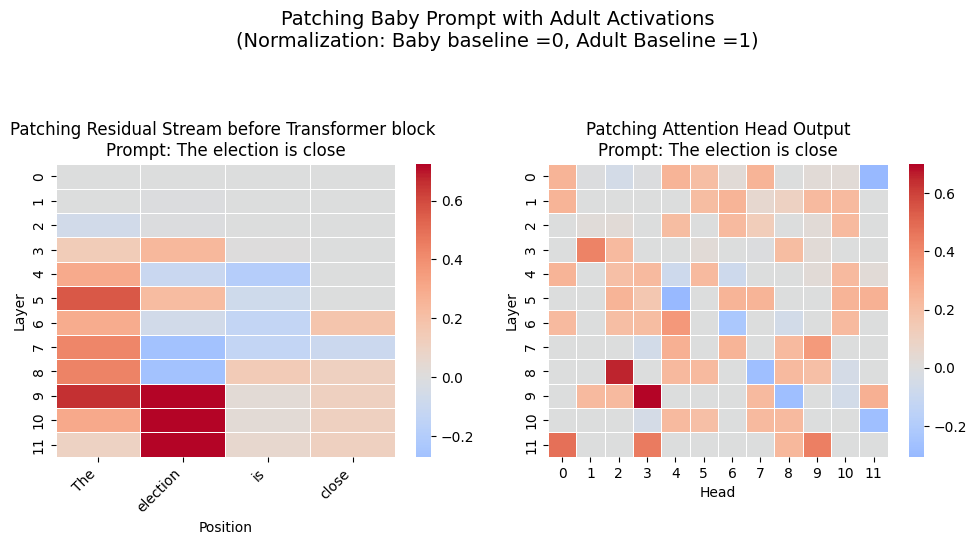

The election is close, the country is on edge
['[', 'BA', 'BY', ']', 'ĠThe', 'Ġelection', 'Ġis', 'Ġclose', ',', 'Ġthe', 'Ġcountry', 'Ġis', 'Ġon', 'Ġedge']


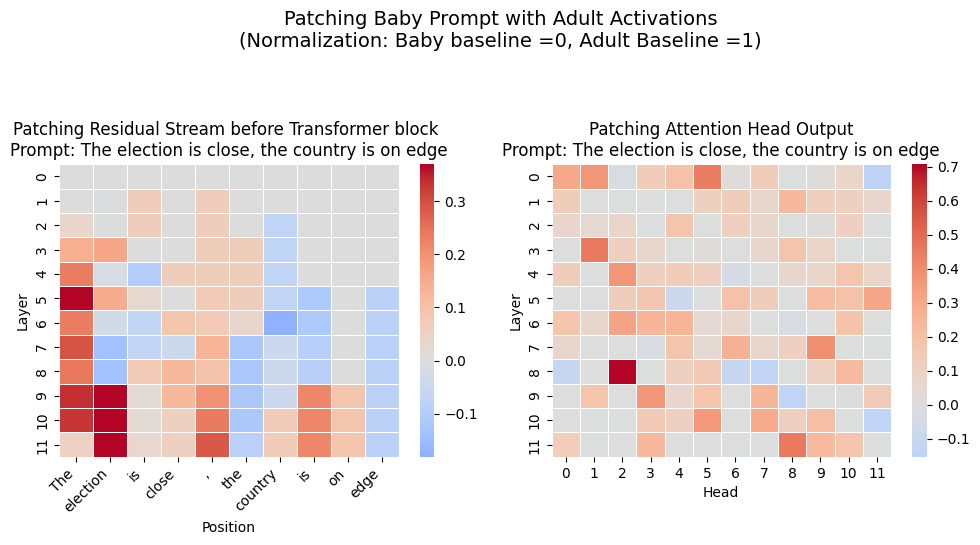

In [ ]:
plot_resid_and_attn_list(patching_results_politic_loaded, skip_tokens=4)

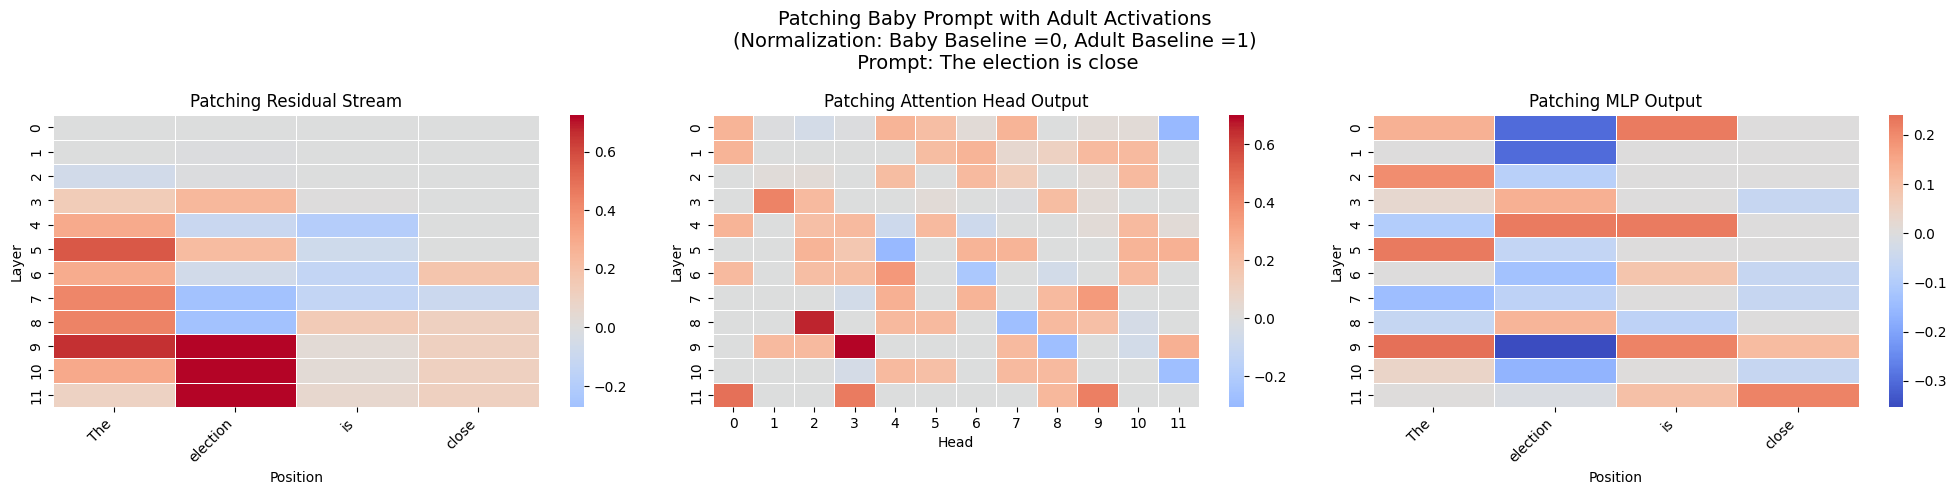

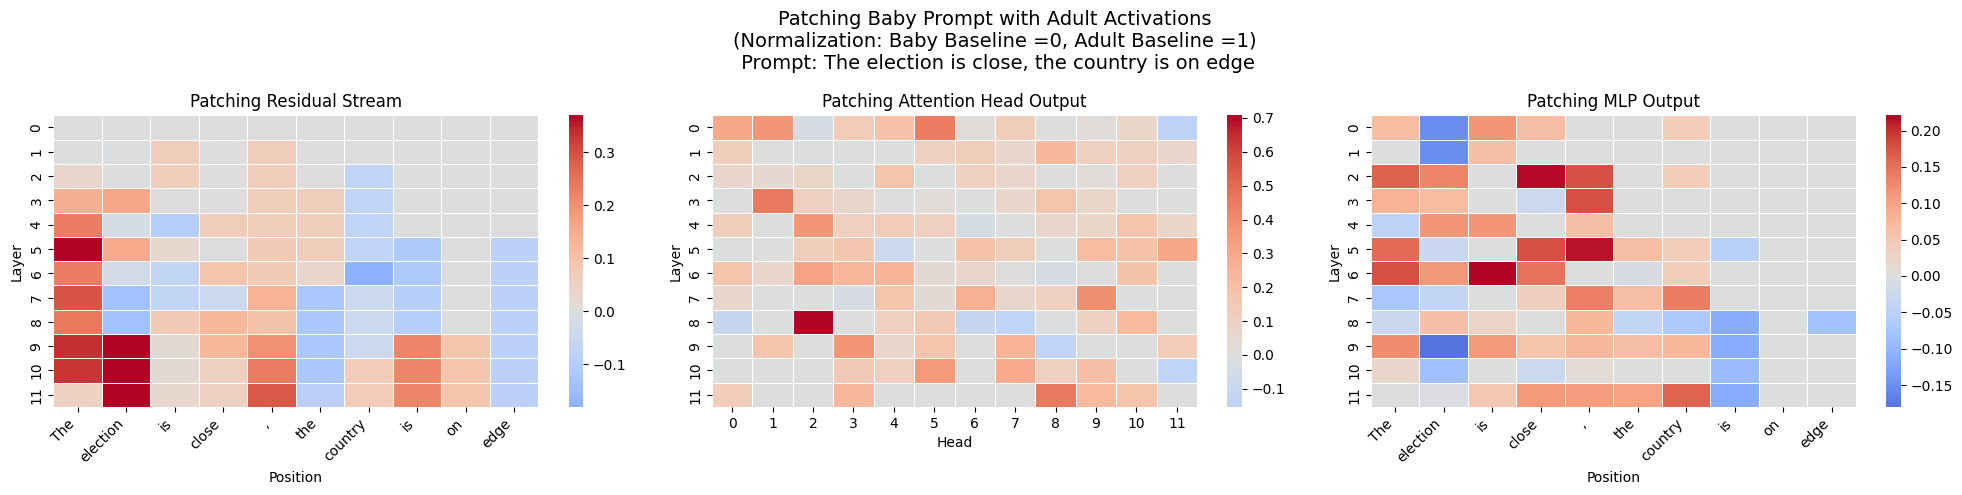

In [ ]:
plot_resid_attn_mlp_list(patching_results_politic_loaded, skip_tokens=4)

In [ ]:

prompt_list = [
    "Dogs like to play",
    "Dogs like to play! They are very friendly"
    ]

# patching_results_baby = baby_patch_adult_cache(prompt_list, tl_model, tokenizer)

# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_baby.pkl", "wb") as f:
#     pickle.dump(patching_results_baby, f)

# More pickling
with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_baby.pkl", "rb") as f:
    patching_results_baby_loaded = pickle.load(f)

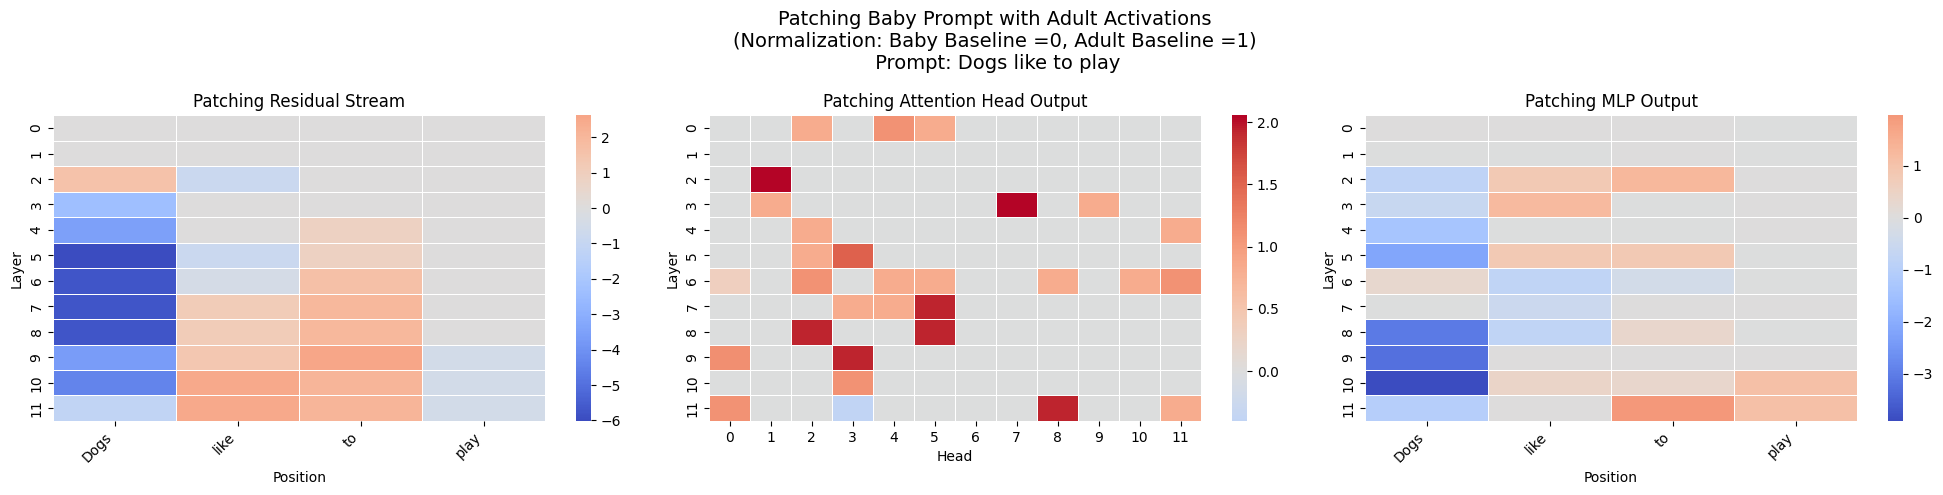

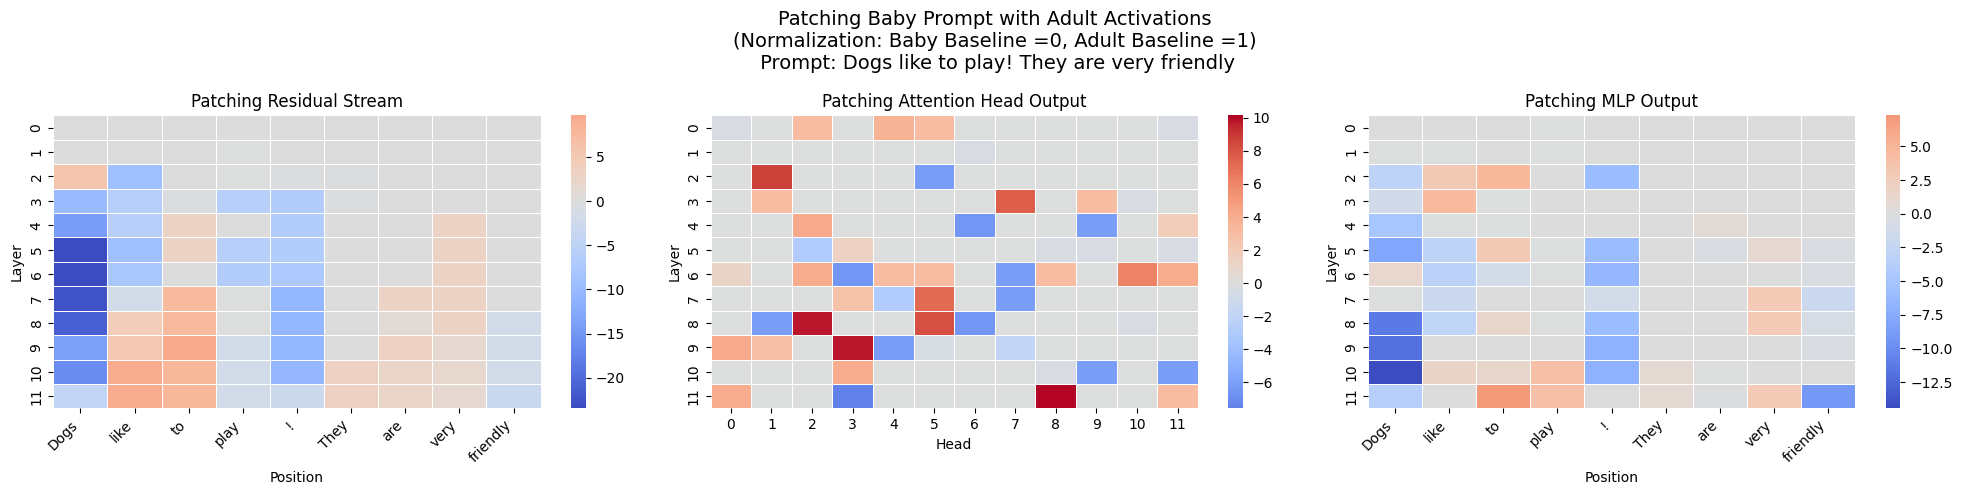

In [ ]:
plot_resid_attn_mlp_list(patching_results_baby_loaded, skip_tokens=4)

In [ ]:
prompt_list = [
    "Photosynthesis occurs when",
    "Photosynthesis is a highly complex process which occurs when"
    ]

# patching_results_science = baby_patch_adult_cache(prompt_list, tl_model, tokenizer)


# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_science.pkl", "wb") as f:
#     pickle.dump(patching_results_science, f)

# More pickling
with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_science.pkl", "rb") as f:
    patching_results_science_loaded = pickle.load(f)

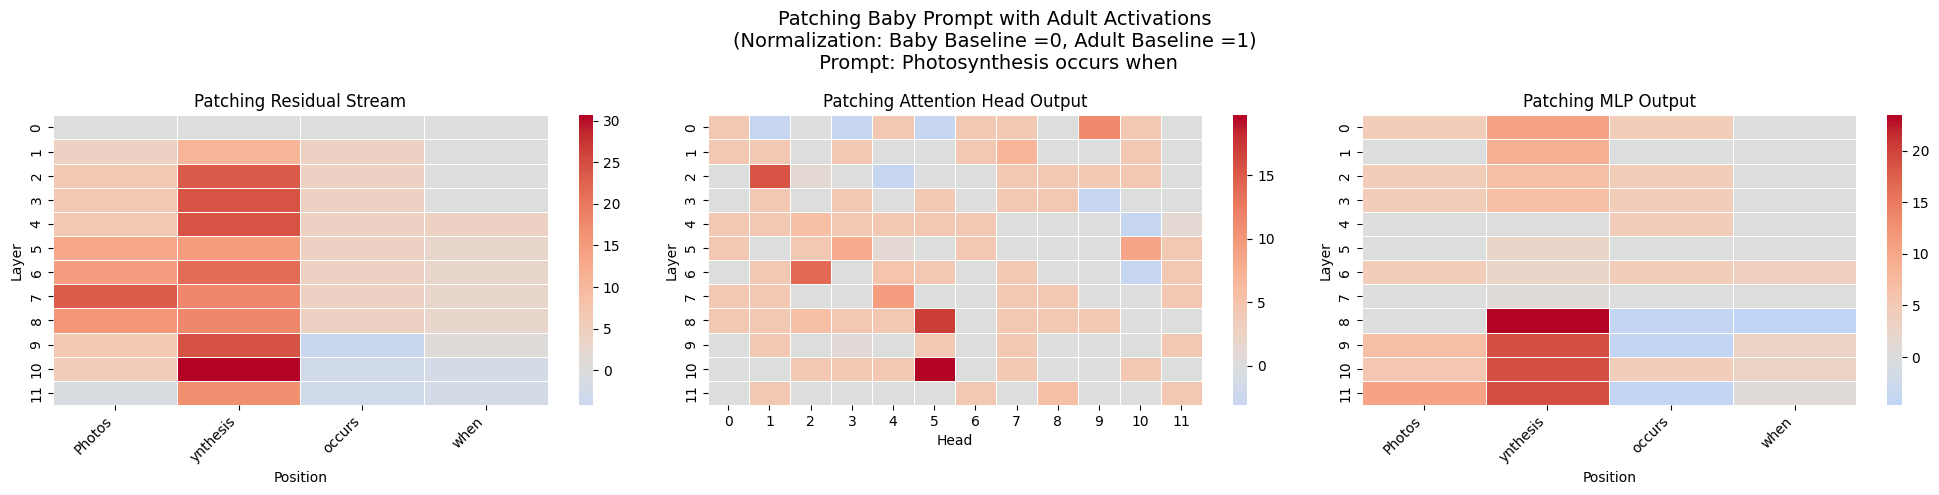

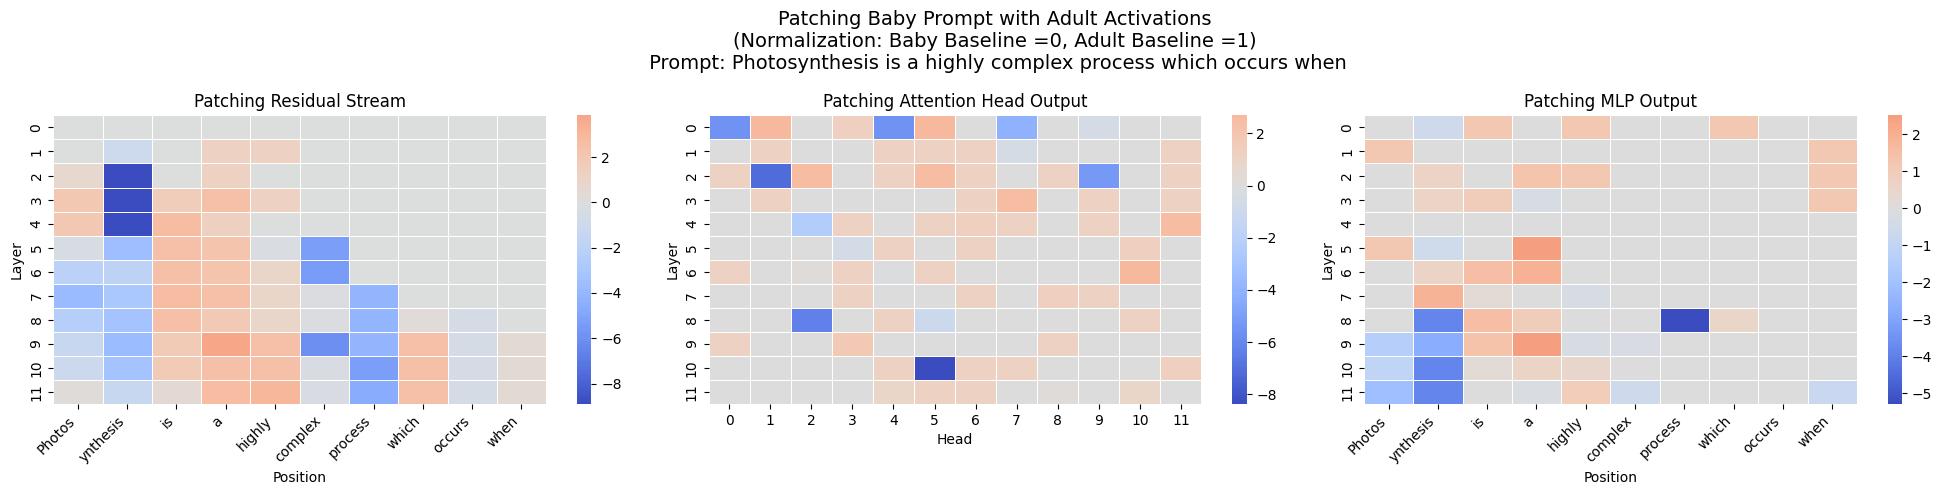

In [ ]:
plot_resid_attn_mlp_list(patching_results_science_loaded, skip_tokens=4)

In [ ]:

prompt_list = [
    "The dog is happy.",
    "The seraphic hound exudes euphoria."
    ]

# patching_results_mixed = baby_patch_adult_cache(prompt_list, tl_model, tokenizer)

# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_mixed.pkl", "wb") as f:
#     pickle.dump(patching_results_mixed, f)

# More pickling
with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_mixed.pkl", "rb") as f:
   patching_results_mixed_loaded = pickle.load(f)

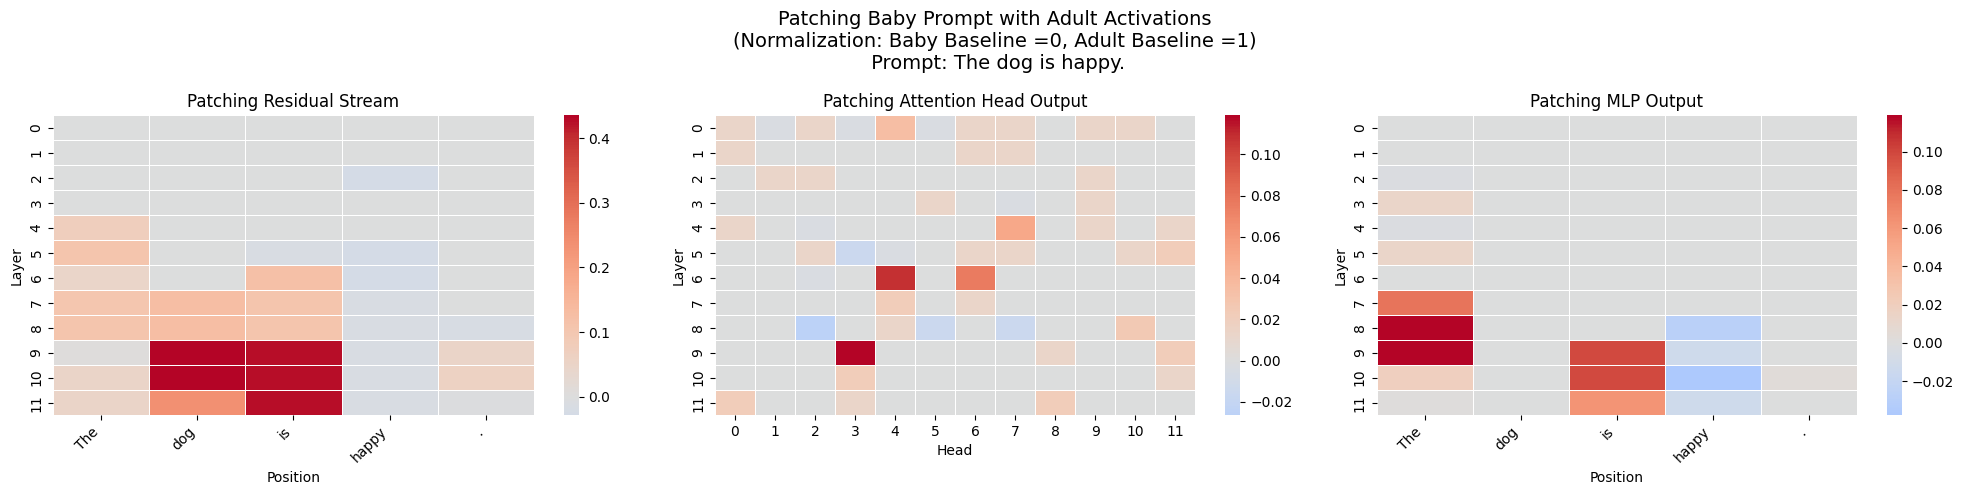

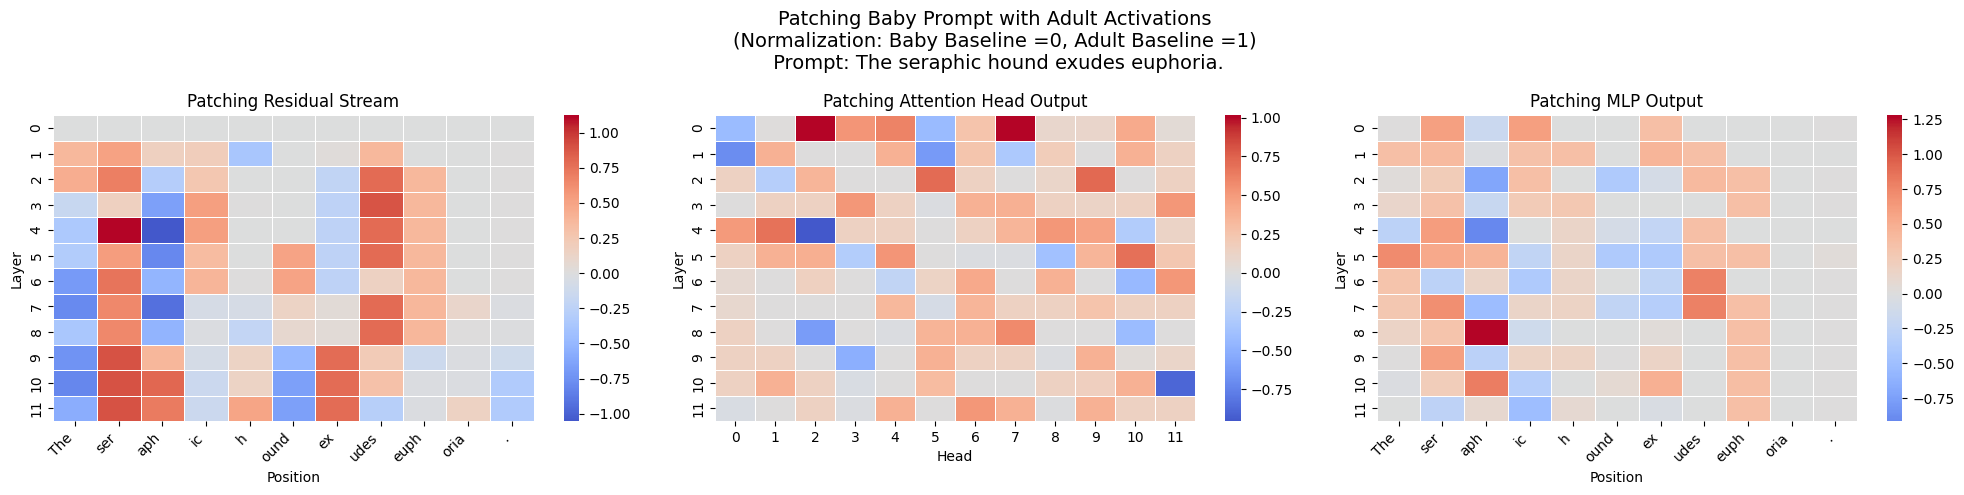

In [ ]:
plot_resid_attn_mlp_list(patching_results_mixed_loaded, skip_tokens=4)

# Patching adult with baby cache -> very similar to earlier

In [ ]:
# ----- Custom Complexity Metric Function 2 -----
def custom_complexity_metric_from_logits_2(logits, tokens, top_k: int = 10):
    """
    Computes a normalized complexity score from the provided logits and tokens.
    The score is normalized using the BABY and ADULT baselines so that:
      - BABY prompt returns -1.
      - ADULT prompt returns 0.
    """

    score = get_average_complexity_from_logits(logits, tokens, top_k)
    if score is None:
        print("Warning: No valid tokens found")
        score = BABY_BASELINE if BABY_BASELINE is not None else 0.0
    # Check if baselines are valid:
    if BABY_BASELINE is None or ADULT_BASELINE is None:
        raise ValueError("Baseline values are not properly set.")
    normalized_score = (score - ADULT_BASELINE) / (ADULT_BASELINE - BABY_BASELINE)
    return normalized_score

#we pass this to TL
def custom_metric_wrapper_2(logits):
    """
    Expects logits of shape [sequence_length, vocab_size] for a single example.
    Returns the normalized complexity metric.
    """
    return torch.tensor(custom_complexity_metric_from_logits_2(logits[0], tokens_adult, top_k=10))


In [ ]:
# ----- Baseline Computation Using Logits -----

# Define our baseline prompts
BABY_PROMPT = "[BABY] je suis stupide"
ADULT_PROMPT = "[ADULT] je suis stupide"

# Compute baseline logits and tokens for the BABY prompt
input_ids_baby = tokenizer.encode(BABY_PROMPT, return_tensors="pt")
tokens_baby = tokenizer.convert_ids_to_tokens(input_ids_baby[0])
logits_baby, cache_baby = tl_model.run_with_cache(input_ids_baby)

# cuz its a (1, x, x)
BABY_BASELINE = get_average_complexity_from_logits(logits_baby[0], tokens_baby)

# Compute baseline logits and tokens for the ADULT prompt
input_ids_adult = tokenizer.encode(ADULT_PROMPT, return_tensors="pt")
tokens_adult = tokenizer.convert_ids_to_tokens(input_ids_adult[0])

logits_adult, cache_adult = tl_model.run_with_cache(input_ids_adult)
ADULT_BASELINE = get_average_complexity_from_logits(logits_adult[0], tokens_adult)


# Baseline check:
# Using the same function on the baseline prompts should return values near 0 and 1.
input_ids_baby = tokenizer.encode(BABY_PROMPT, return_tensors="pt")
tokens_baby = tokenizer.convert_ids_to_tokens(input_ids_baby[0])
logits_baby, cache_baby = tl_model.run_with_cache(input_ids_baby)
print(f"Baby baseline (should be -1): {custom_complexity_metric_from_logits_2(logits_baby[0], tokens_baby):.4f}")

input_ids_adult = tokenizer.encode(ADULT_PROMPT, return_tensors="pt")
tokens_adult = tokenizer.convert_ids_to_tokens(input_ids_adult[0])
logits_adult, cache_adult = tl_model.run_with_cache(input_ids_adult)
print(f"Adult baseline (should be 0): {custom_complexity_metric_from_logits_2(logits_adult[0], tokens_adult):.4f}")

Baby baseline (should be -1): -1.0000
Adult baseline (should be 0): -0.0000


In [ ]:
# resid_pre_act_patch_results = patching.get_act_patch_resid_pre(tl_model, input_ids_adult, cache_baby, custom_metric_wrapper_2)
# attn_head_out_all_pos_act_patch_results = patching.get_act_patch_attn_head_out_all_pos(tl_model, input_ids_adult, cache_baby, custom_metric_wrapper_2)


# AUTOMATING PATCHING ADULT RESULTS W BABY CACHE

In [ ]:
#just flipped the earlier logic

def custom_complexity_metric_from_logits_2(logits, tokens, baby_baseline, adult_baseline, top_k: int = 10):
    """
    Computes a normalized complexity score from the provided logits and tokens,
    using provided baseline values so that:
      - BABY prompt returns -1.
      - ADULT prompt returns 0.
    """
    score = get_average_complexity_from_logits(logits, tokens, top_k)
    if score is None:
        print("Warning: No valid tokens found")
        score = baby_baseline if baby_baseline is not None else 0.0
    if baby_baseline is None or adult_baseline is None:
        raise ValueError("Baseline values are not properly set.")
    normalized_score = (score - adult_baseline) / (adult_baseline - baby_baseline)
    return normalized_score

def custom_metric_wrapper_2_factory(baby_baseline, adult_baseline, tokens):
    """
    Returns a custom metric wrapper function that uses the given baselines and tokens.
    The returned function expects logits of shape [sequence_length, vocab_size] for a single example.
    """
    def wrapper(logits):
        # Index [0] to remove the batch dimension
        metric = custom_complexity_metric_from_logits_2(logits[0], tokens, baby_baseline, adult_baseline, top_k=10)
        return torch.tensor(metric)
    return wrapper

In [ ]:
def adult_patch_baby_cache(prompt_list, tl_model = tl_model, tokenizer = tokenizer):

  #this function just automates creating proper outputs given prompts
  from collections import defaultdict

  patching_results = defaultdict(list)

  for prompt in prompt_list:
      baby_prompt = "[BABY] " + prompt
      adult_prompt = "[ADULT] " + prompt

      res_adult, res_baby = get_cache_baselines(baby_prompt, adult_prompt)
      ADULT_BASELINE, cache_adult, logits_adult, input_ids_adult, tokens_adult = res_adult
      BABY_BASELINE, cache_baby, logits_baby, input_ids_baby, tokens_baby = res_baby

      custom_metric_wrapper_2 = custom_metric_wrapper_2_factory(BABY_BASELINE, ADULT_BASELINE, tokens_adult)

      # run the patching experiments
      resid_pre_act_patch_results = patching.get_act_patch_resid_pre(tl_model, input_ids_adult, cache_baby, custom_metric_wrapper_2)

      attn_head_out_all_pos_act_patch_results = patching.get_act_patch_attn_head_out_all_pos(tl_model, input_ids_adult, cache_baby, custom_metric_wrapper_2)
      mlp_patch = patching.get_act_patch_mlp_out(tl_model, input_ids_adult, cache_baby, custom_metric_wrapper_2)

      patching_results[prompt] = {
            "resid_pre": resid_pre_act_patch_results,
            "attn_head_out": attn_head_out_all_pos_act_patch_results,
            "mlp_out": mlp_patch,
            "tokens_baby": tokens_baby,
            "tokens_adult": tokens_adult
        }

  return patching_results

In [ ]:

prompt_list = [
    "The election is close",
    "The election is close, the country is on edge"
    ]

# patching_results_politic_b = adult_patch_baby_cache(prompt_list, tl_model, tokenizer)

# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_politic_b.pkl", "wb") as f:
#     pickle.dump(patching_results_politic_b, f)

# PICKLE!!!!
with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_politic_b.pkl", "rb") as f:
    patching_results_politic_b_loaded = pickle.load(f)

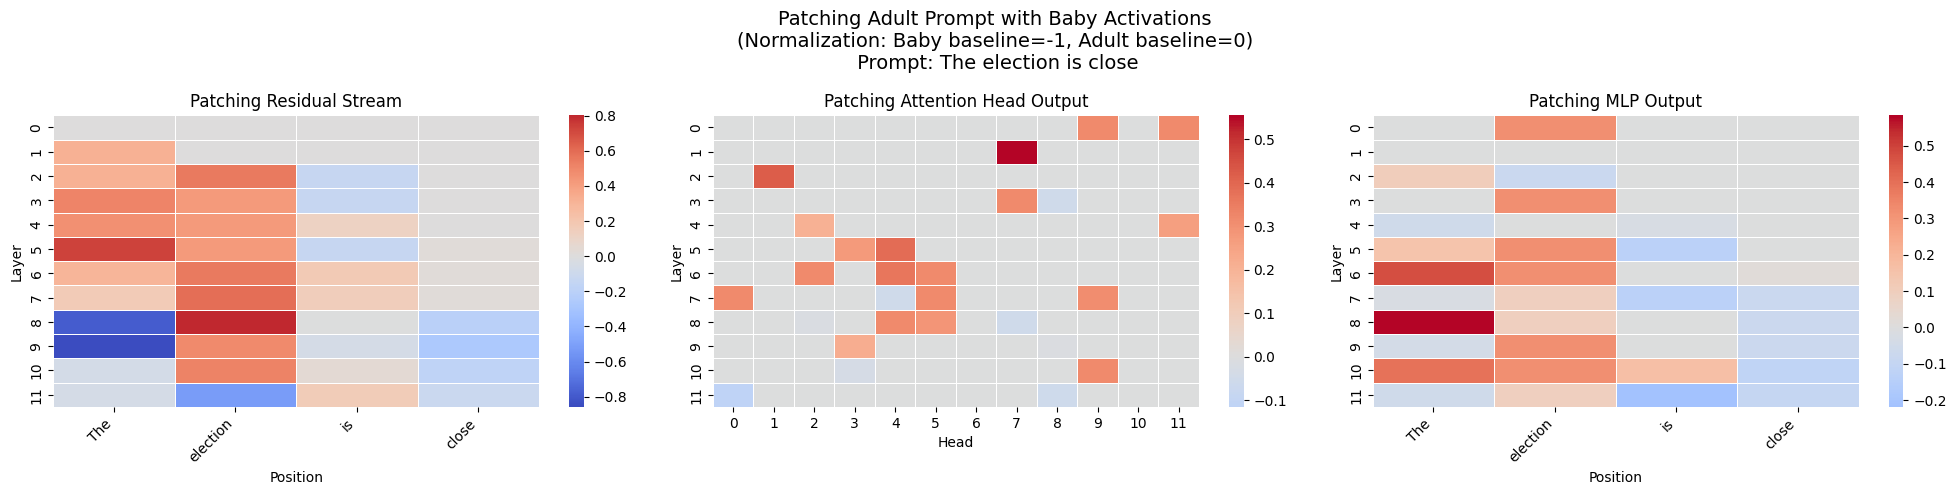

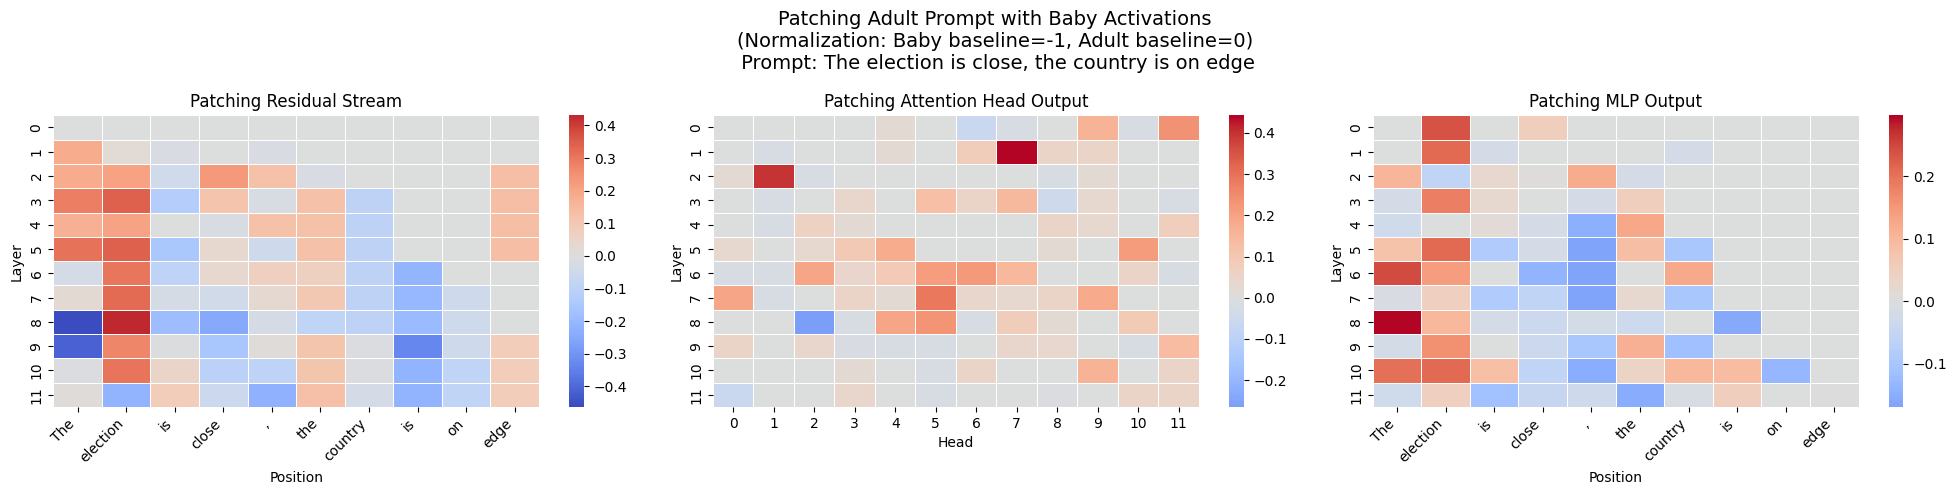

In [ ]:
plot_resid_attn_mlp_list(patching_results_politic_b_loaded, skip_tokens=4, main_title= "Patching Adult Prompt with Baby Activations\n(Normalization: Baby baseline=-1, Adult baseline=0)")

In [ ]:

prompt_list = [
    "Dogs like to play",
    "Dogs like to play! They are very friendly"
    ]

# patching_results_baby_b = adult_patch_baby_cache(prompt_list, tl_model, tokenizer)

# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_baby_b.pkl", "wb") as f:
#     pickle.dump(patching_results_baby_b, f)

# More pickling!
with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_baby_b.pkl", "rb") as f:
    patching_results_baby_b_loaded = pickle.load(f)

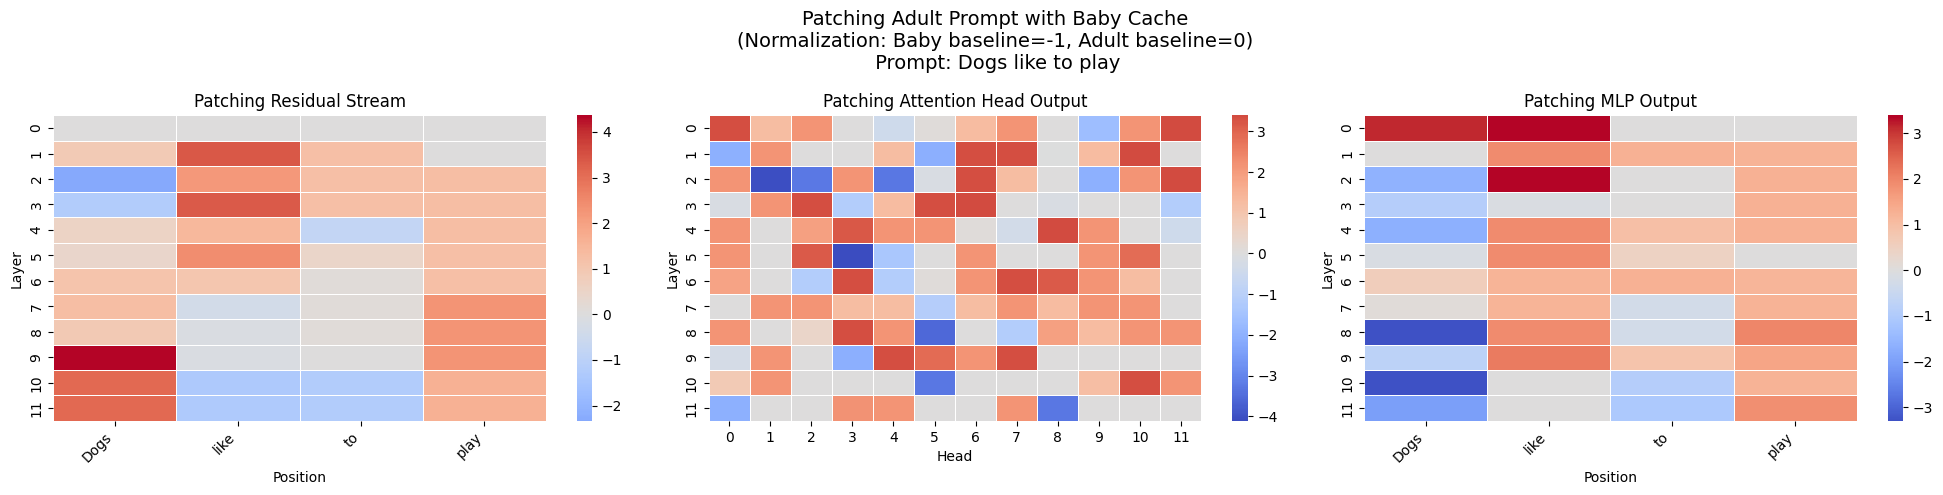

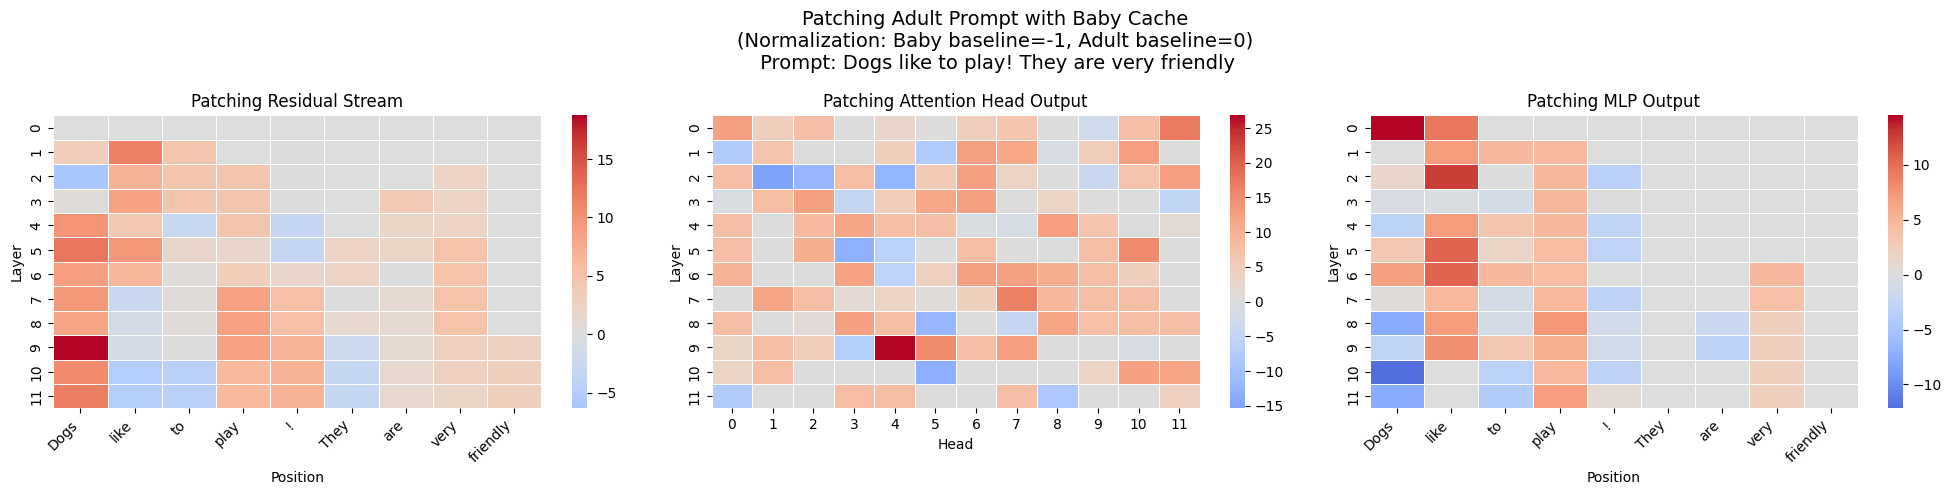

In [ ]:
plot_resid_attn_mlp_list(patching_results_baby_b_loaded, skip_tokens=4, main_title= "Patching Adult Prompt with Baby Cache\n(Normalization: Baby baseline=-1, Adult baseline=0)")

In [ ]:
prompt_list = [
    "Photosynthesis occurs when",
    "Photosynthesis is a highly complex process which occurs when"
    ]

# patching_results_science_b = adult_patch_baby_cache(prompt_list, tl_model, tokenizer)


# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_science_b.pkl", "wb") as f:
#     pickle.dump(patching_results_science_b, f)

# More pickling!
with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_science_b.pkl", "rb") as f:
    patching_results_science_b_loaded = pickle.load(f)

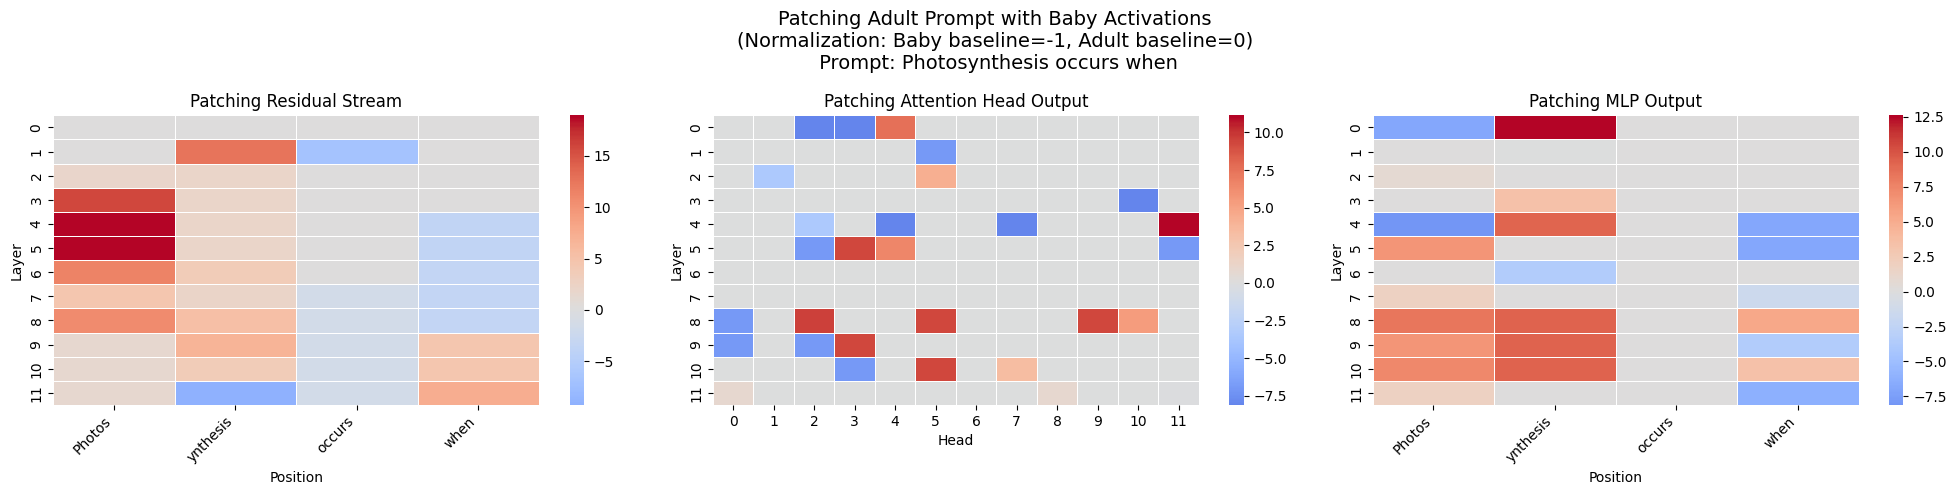

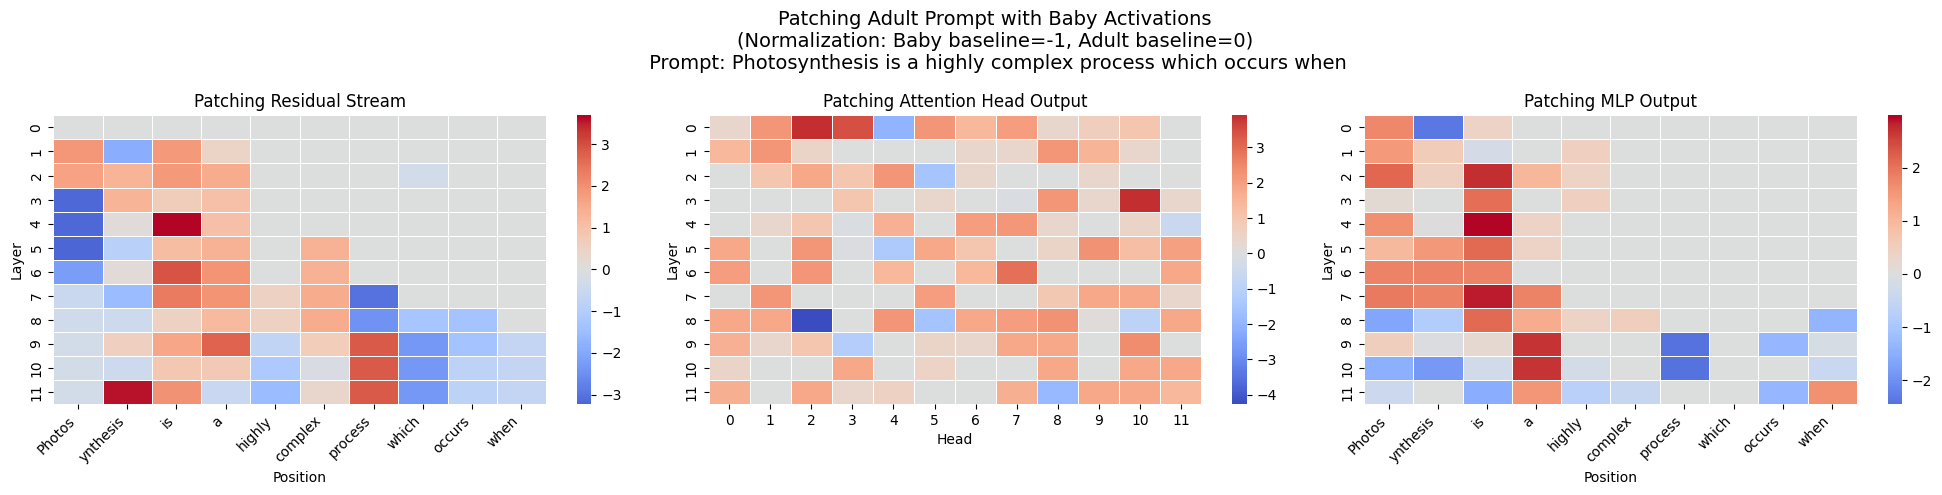

In [ ]:
plot_resid_attn_mlp_list(patching_results_science_b_loaded, skip_tokens=4, main_title= "Patching Adult Prompt with Baby Activations\n(Normalization: Baby baseline=-1, Adult baseline=0)")

In [ ]:

prompt_list = [
    "The dog is happy.",
    "The seraphic hound exudes euphoria."
    ]

# patching_results_mixed_b = adult_patch_baby_cache(prompt_list, tl_model, tokenizer)

# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_mixed_b.pkl", "wb") as f:
#     pickle.dump(patching_results_mixed_b, f)

# More pickling
with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_mixed_b.pkl", "rb") as f:
   patching_results_mixed_b_loaded = pickle.load(f)

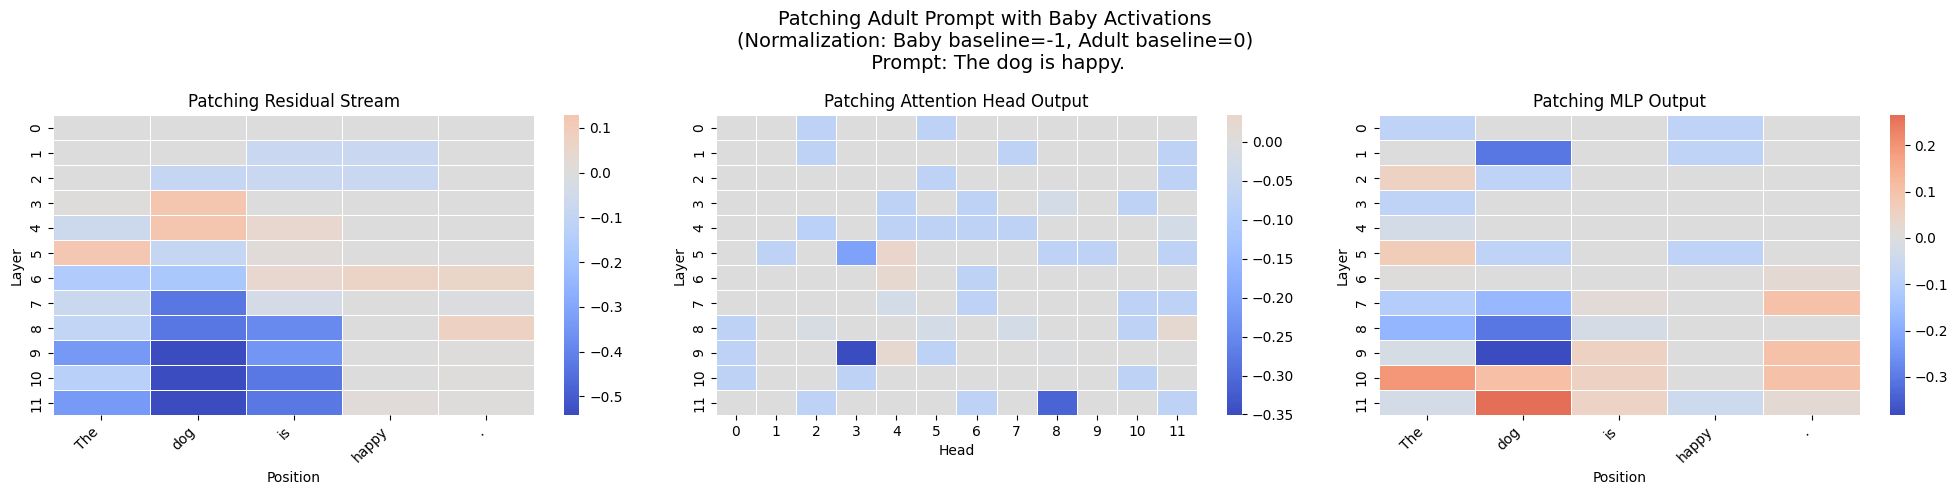

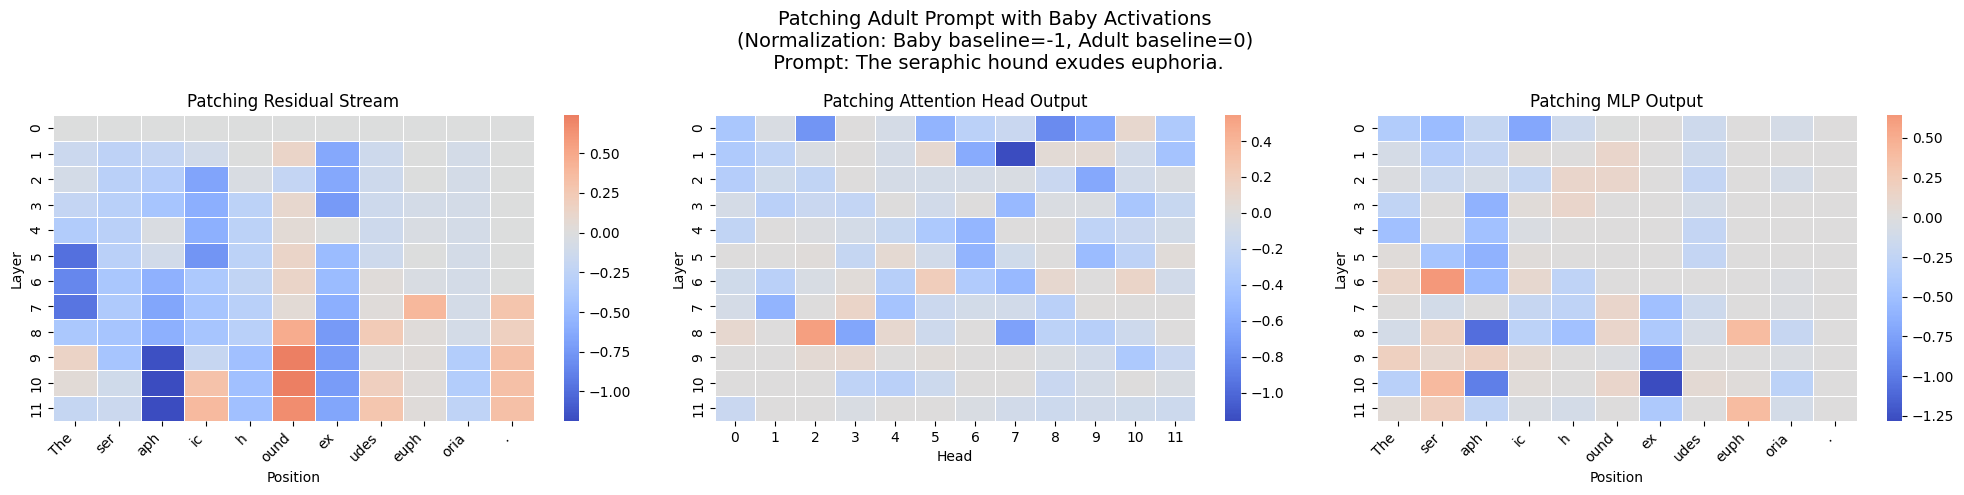

In [ ]:
plot_resid_attn_mlp_list(patching_results_mixed_b_loaded, skip_tokens=4, main_title= "Patching Adult Prompt with Baby Activations\n(Normalization: Baby baseline=-1, Adult baseline=0)")

## Patching entire blocks - what happens now?

In [ ]:
def adult_patch_baby_blocks(prompt_list, tl_model=tl_model, tokenizer=tokenizer):
    """
    Patches entire transformer blocks of the adult forward-pass with baby activations.
    """
    from collections import defaultdict

    patching_results = defaultdict(list)

    for prompt in prompt_list:
        baby_prompt = "[BABY] " + prompt
        adult_prompt = "[ADULT] " + prompt

        res_adult, res_baby = get_cache_baselines(baby_prompt, adult_prompt)
        ADULT_BASELINE, cache_adult, logits_adult, input_ids_adult, tokens_adult = res_adult
        BABY_BASELINE, cache_baby, logits_baby, input_ids_baby, tokens_baby = res_baby

        # Create a custom metric wrapper (uses adult tokens because we patch adult with baby)
        custom_metric_wrapper_block = custom_metric_wrapper_2_factory(BABY_BASELINE, ADULT_BASELINE, tokens_adult)

        # Patching entire transformer blocks
        block_patch_results = patching.get_act_patch_block_every(
            tl_model, input_ids_adult, cache_baby, custom_metric_wrapper_block
        )

        patching_results[prompt] = {
            "block_patch": block_patch_results,
            "tokens_baby": tokens_baby,
            "tokens_adult": tokens_adult
        }

    return patching_results


In [ ]:
def baby_patch_adult_blocks(prompt_list, tl_model=tl_model, tokenizer=tokenizer):
    """
    Patches entire transformer blocks of the baby forward-pass with adult activations.
    """
    from collections import defaultdict

    patching_results = defaultdict(list)

    for prompt in prompt_list:
        baby_prompt = "[BABY] " + prompt
        adult_prompt = "[ADULT] " + prompt

        res_adult, res_baby = get_cache_baselines(baby_prompt, adult_prompt)
        ADULT_BASELINE, cache_adult, logits_adult, input_ids_adult, tokens_adult = res_adult
        BABY_BASELINE, cache_baby, logits_baby, input_ids_baby, tokens_baby = res_baby

        # Create a custom metric wrapper (uses baby tokens because we patch baby with adult)
        custom_metric_wrapper_block = custom_metric_wrapper_1_factory(BABY_BASELINE, ADULT_BASELINE, tokens_baby)

        # Patching entire transformer blocks
        block_patch_results = patching.get_act_patch_block_every(
            tl_model, input_ids_baby, cache_adult, custom_metric_wrapper_block
        )

        patching_results[prompt] = {
            "block_patch": block_patch_results,
            "tokens_baby": tokens_baby,
            "tokens_adult": tokens_adult
        }

    return patching_results


In [ ]:
def plot_block_patching_results(
    patching_results_block,
    skip_tokens=4,
    figsize=(21,9),
    main_title="Activation Patching Per Block"
):
    """
    Plots heatmaps for patching results across full transformer blocks.

    patching_results_block: dict with format
        {
            "prompt": str,
            "block_patch": <tensor [num_blocks, num_layers, num_positions]>,
            "tokens_baby": <list of tokens>,  # or "tokens_adult"
        }

    Produces one figure per prompt, showing:
      1) Residual Stream (rows=layers, cols=positions)
      2) Attention Head Output (rows=layers, cols=positions)
      3) MLP Output (rows=layers, cols=positions)

    skip_tokens: how many tokens from the left to skip in the x-axis
    main_title: suptitle for each figure
    """

    def strip_special(token: str):
        # Remove leading "Ġ" (common in tokenized text) and strip whitespace
        return token.lstrip("Ġ").strip()

    for prompt in patching_results_block:
        # Extract data for this prompt
        block_tensor = patching_results_block[prompt]["block_patch"]  # Shape [num_blocks, num_layers, num_positions]
        tokens_baby = patching_results_block[prompt]["tokens_baby"]

        # Convert tensor to NumPy
        block_np = block_tensor.cpu().numpy()  # Shape [num_blocks, num_layers, num_positions]

        resid_np, attn_np, mlp_np = block_np  # Shape [num_layers, num_positions]
        attn_np = attn_np[:, 4:]

        if skip_tokens < resid_np.shape[1]:
            resid_np = resid_np[:, skip_tokens:]
            mlp_np = mlp_np[:, skip_tokens:]
            tokens_plot = tokens_baby[skip_tokens:]
        else:
            tokens_plot = tokens_baby

        print("Attention Output Shape:", attn_np.shape)
        print("Expected Positions:", len(tokens_plot))

        tokens_plot = [strip_special(tok) for tok in tokens_plot]

        # Create a figure with 3 subplots (for Residual, Attention, MLP)
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
        fig.suptitle(main_title + f"\n Prompt: {prompt}", fontsize=14)

        # --- Subplot 1: Residual Stream ---
        sns.heatmap(
            resid_np,
            ax=axes[0],
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar=True
        )
        axes[0].set_title("Residual Stream")
        axes[0].set_xlabel("Position")
        axes[0].set_ylabel("Layer")
        axes[0].set_xticks(np.arange(len(tokens_plot)) + 0.5)
        axes[0].set_xticklabels(tokens_plot, rotation=45, ha="right")

        # --- Subplot 2: Attention Output ---
        sns.heatmap(
            attn_np,
            ax=axes[1],
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar=True
        )
        axes[1].set_title("Attention Output")
        axes[1].set_xlabel("Position")
        axes[1].set_ylabel("Layer")
        axes[1].set_xticks(np.arange(len(tokens_plot)) + 0.5)
        axes[1].set_xticklabels(tokens_plot, rotation=45, ha="right")

        # --- Subplot 3: MLP Output ---
        sns.heatmap(
            mlp_np,
            ax=axes[2],
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar=True
        )
        axes[2].set_title("MLP Output")
        axes[2].set_xlabel("Position")
        axes[2].set_ylabel("Layer")
        axes[2].set_xticks(np.arange(len(tokens_plot)) + 0.5)
        axes[2].set_xticklabels(tokens_plot, rotation=45, ha="right")

        plt.tight_layout()
        plt.show()


In [ ]:

prompt_list = [
    "The dog is very happy.",
    "Dogs like to play"
    ]

patching_results_block_b = adult_patch_baby_blocks(prompt_list, tl_model, tokenizer)

# with open("/content/drive/MyDrive/NLP_Final_project/Experiments/patching_results_baby_b.pkl", "wb") as f:
#     pickle.dump(patching_results_baby_b, f)

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Attention Output Shape: (12, 6)
Expected Positions: 6


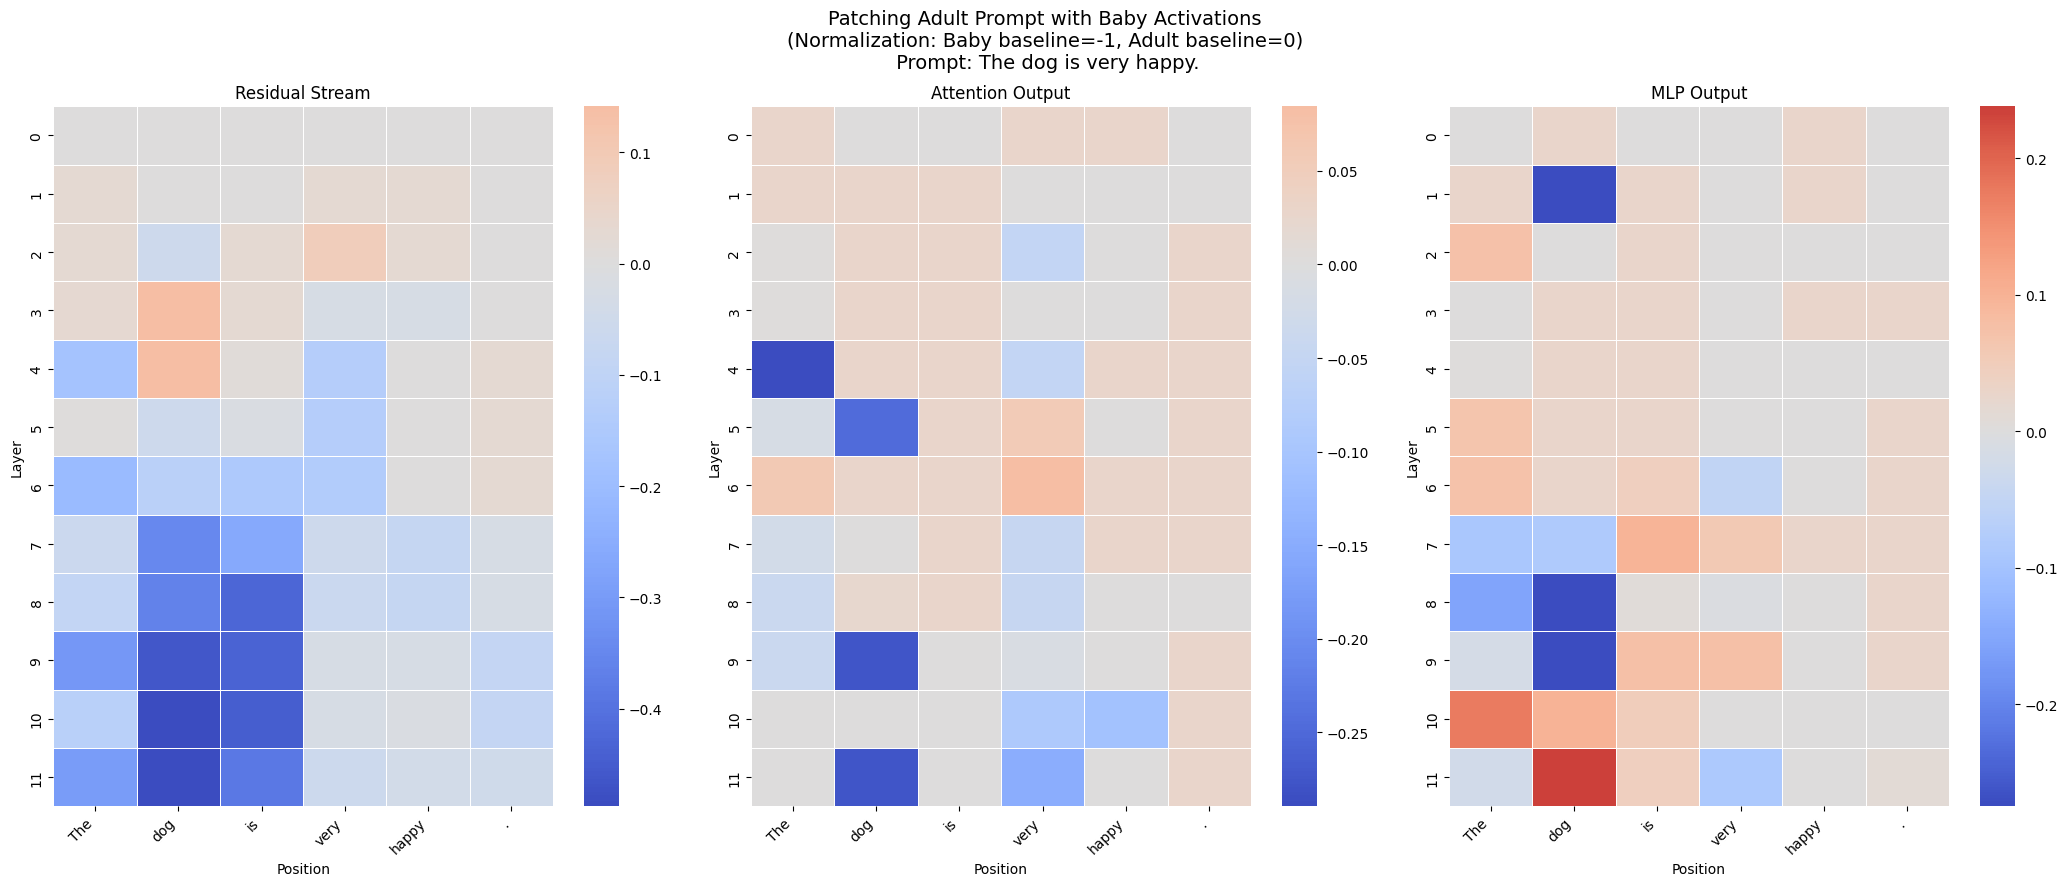

Attention Output Shape: (12, 4)
Expected Positions: 4


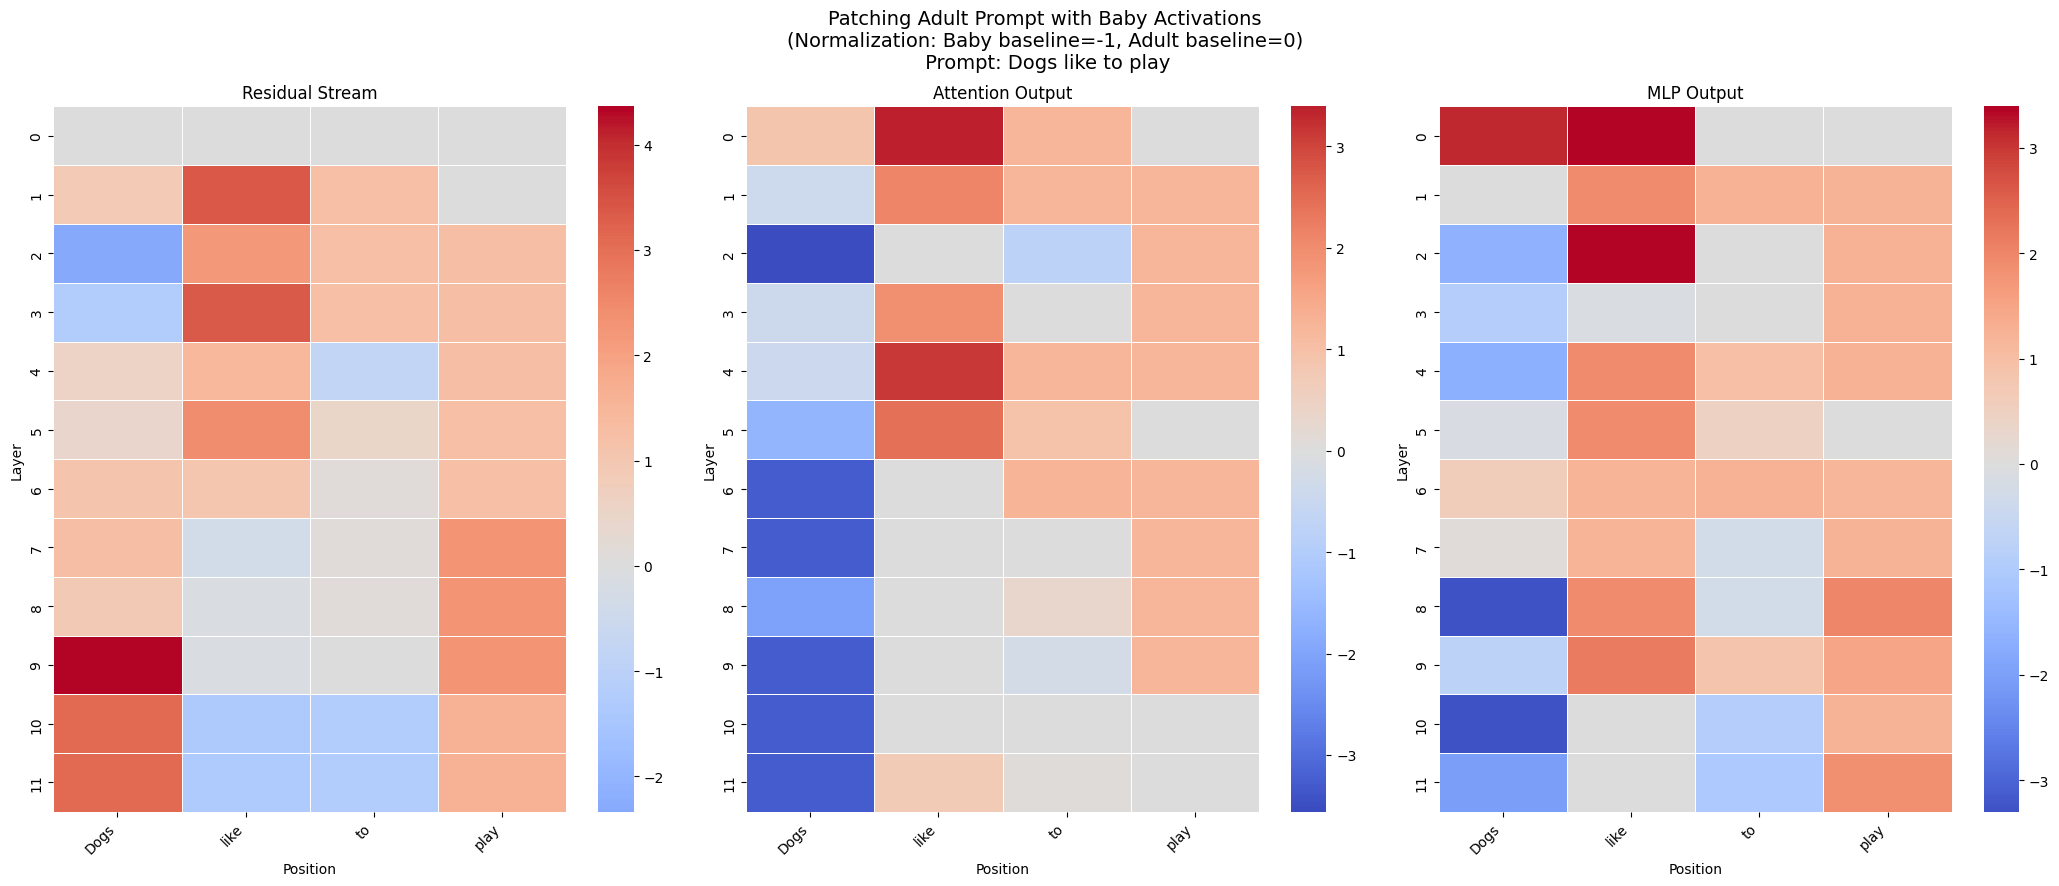

In [ ]:
plot_block_patching_results(patching_results_block_b, main_title = 'Patching Adult Prompt with Baby Activations\n(Normalization: Baby baseline=-1, Adult baseline=0)')


In [ ]:
print(patching_results_block_b['The dog is very happy.']['block_patch'].shape)

torch.Size([3, 12, 10])


In [ ]:
patching_results_block = baby_patch_adult_blocks(prompt_list, tl_model, tokenizer)


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Attention Output Shape: (12, 6)
Expected Positions: 6


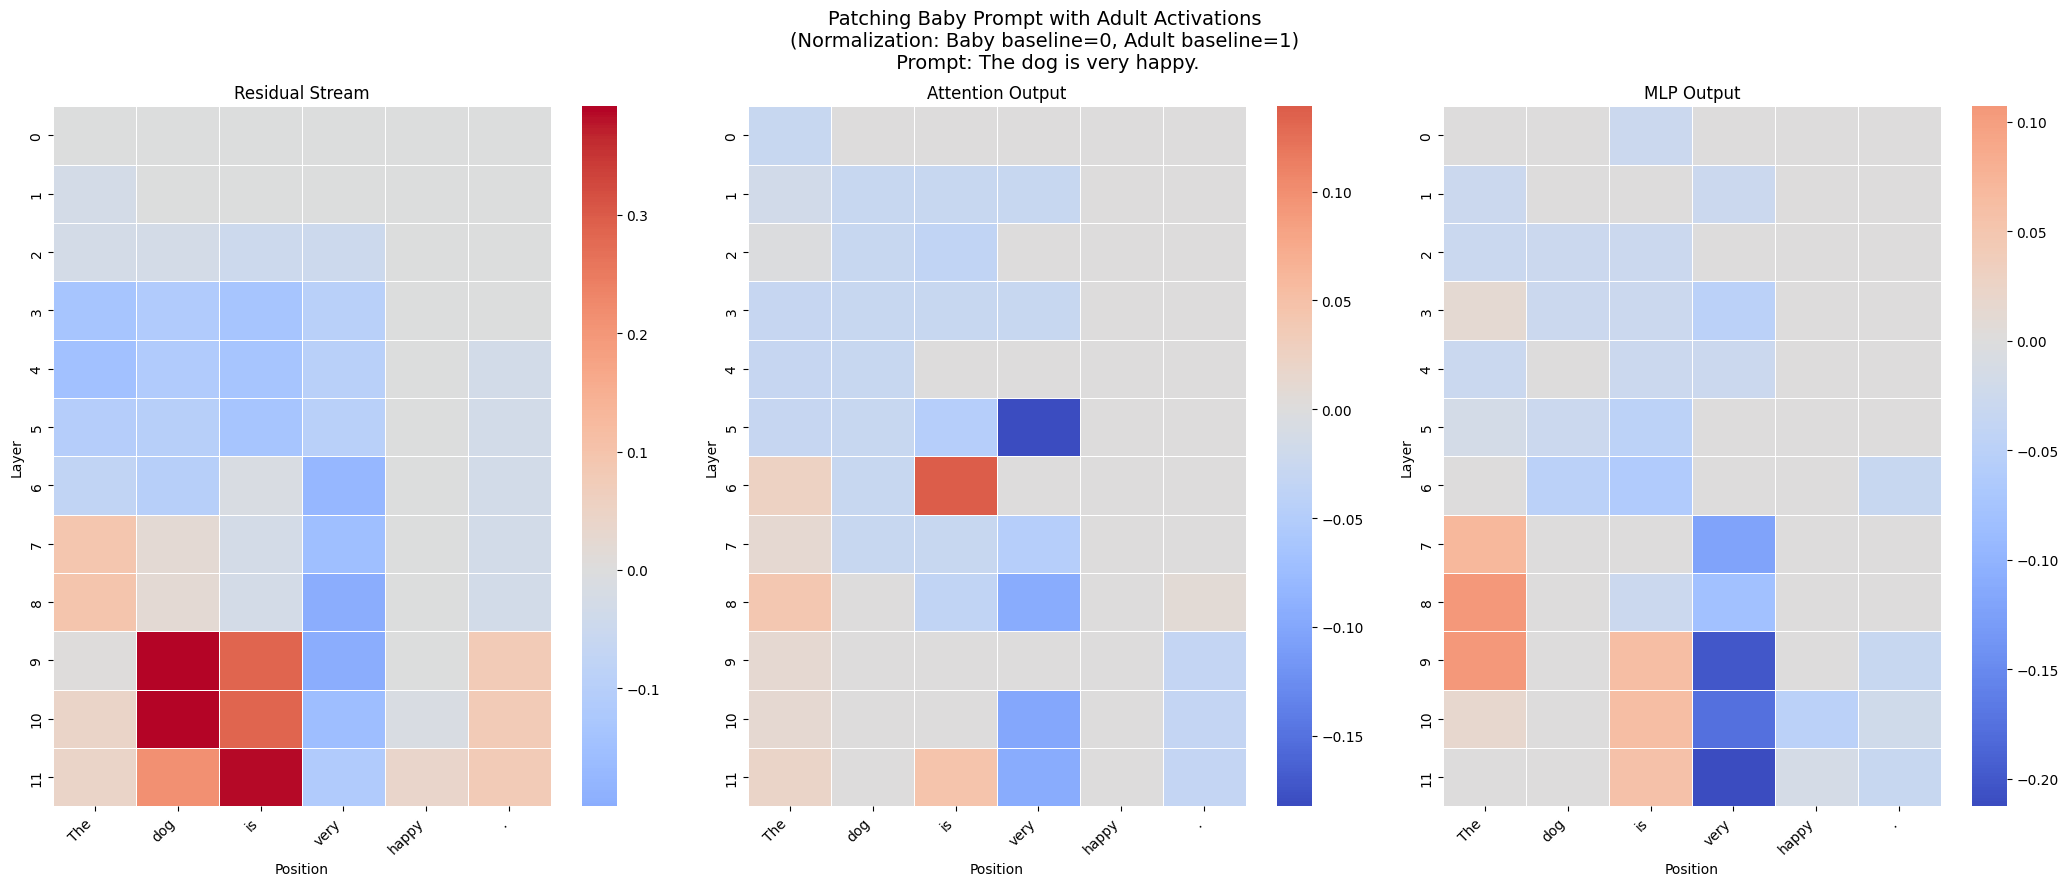

Attention Output Shape: (12, 4)
Expected Positions: 4


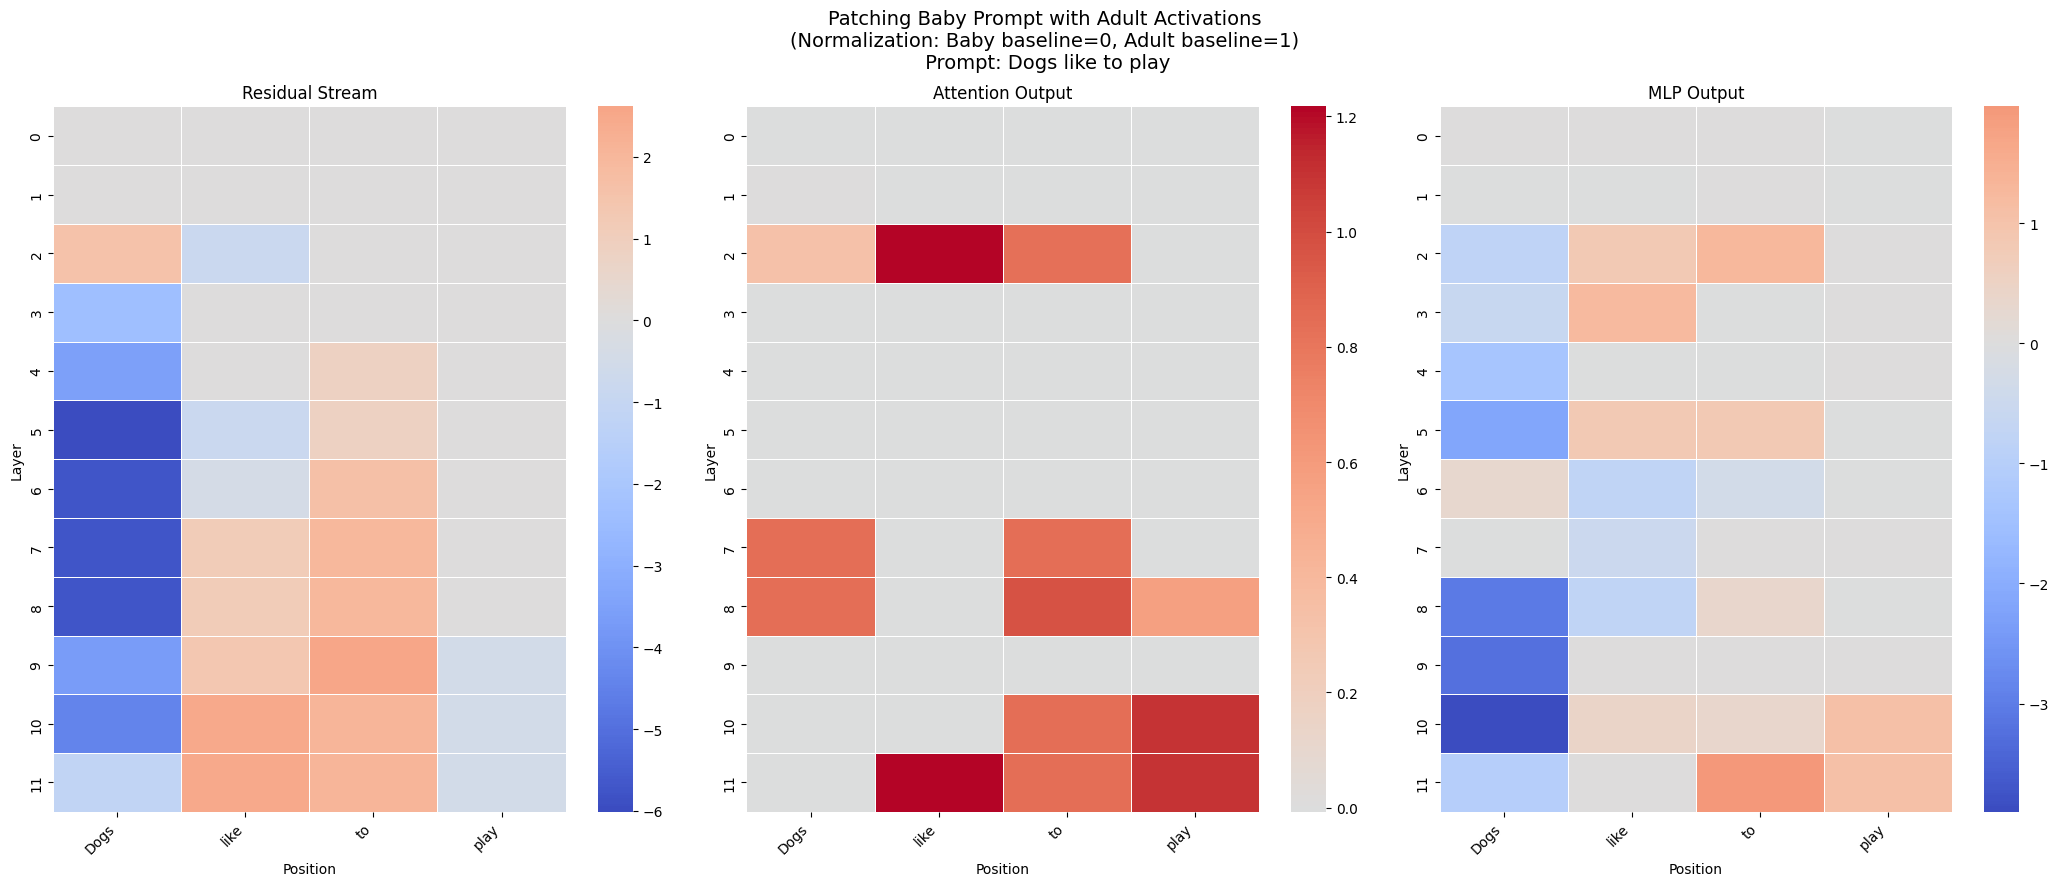

In [ ]:
plot_block_patching_results(patching_results_block, main_title = 'Patching Baby Prompt with Adult Activations\n(Normalization: Baby baseline=0, Adult baseline=1)')
